Title: CS909 Assignment 2

Author: 2138473

Date: 23/03/2022


In [1]:
# load the data

import numpy as np
import pandas as pd

X = np.load("images.npy", encoding = 'bytes') # read images
Y = pd.read_csv('counts.csv') # read cell counts 
F = np.loadtxt('split.txt') # read fold information

In [2]:
# checking the cell count data frame

Y.head()

neutrophil  epithelial  lymphocyte  plasma  eosinophil  connective
0           0         117           0       0           0           0
1           0          95           1       0           0           8
2           0         172           3       0           0           2
3           0          56           0       0           0          10
4           0         169           7       0           0           0

In [2]:
# rename the variables of cell count dataframe

Y  = Y.rename(columns = {
    'neutrophil': 'T1',
    'epithelial': 'T2',
    'lymphocyte': 'T3',
    'plasma': 'T4',	
    'eosinophil': 'T5',
    'connective': 'T6'})

Y.head()

T1   T2  T3  T4  T5  T6
0   0  117   0   0   0   0
1   0   95   1   0   0   8
2   0  172   3   0   0   2
3   0   56   0   0   0  10
4   0  169   7   0   0   0

### Question 1: Load the training and test data files and answer the following questions:

Q1.i: How many examples are there in each fold?

In [4]:
# check the shape of data

print("image data shape: ", X.shape)
print('cell count data shape: ', Y.shape)
print('fold data shape: ', F.shape)

image data shape:  (4981, 256, 256, 3)
cell count data shape:  (4981, 6)
fold data shape:  (4981,)


In [5]:
# count the number of examples in each fold

FirstFold = 0
SecondFold = 0
ThirdFold = 0

for i in F:
    if i < 2:
        FirstFold += 1
    elif i > 2:
        ThirdFold += 1
    else:
        SecondFold += 1
        
print('A1.i: The number of instances in the first fold is: ', FirstFold, '\n', 
      '     The number of the instances in the second fold is: ', SecondFold, '\n',
     '     The number of the instances in the third fold is: ', ThirdFold, '\n')

A1.i: The number of instances in the first fold is:  1622 
      The number of the instances in the second fold is:  1751 
      The number of the instances in the third fold is:  1608 



Q1.ii: Show some image examples using plt.imshow. Describe your observations on what you 
see in the images and how it correlates with the cell counts of different types of cells 
especially T3 cells.

In [6]:
# generate 20 random numbers for print examples, here I specifically choose the index of examples for which contains T3 cells > 20

from random import seed
from random import choice

# extrace the values of each type of cells in the cell count index

T1 = Y['T1'].values.tolist()
T2 = Y['T2'].values.tolist()
T3 = Y['T3'].values.tolist()
T4 = Y['T4'].values.tolist()
T5 = Y['T5'].values.tolist()
T6 = Y['T6'].values.tolist()

# get the index for instances which have T3 cell count > 30

index = []
for i in T3:
    if i > 20:
        index.append(T3.index(i))

# generate the 8 examples

seed(123)

value = []
for i in range(20):
  value.append(choice(index))

print(value)

[38, 2769, 976, 1223, 2784, 246, 248, 58, 293, 202, 156, 551, 9, 251, 515, 156, 1050, 493, 4901, 38]


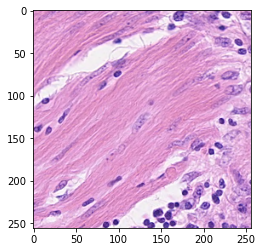

1 . cell count in the image,  {'T1': 0, 'T2': 0, 'T3': 21, 'T4': 2, 'T5': 0, 'T6': 27}


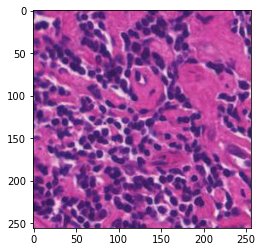

2 . cell count in the image,  {'T1': 0, 'T2': 0, 'T3': 184, 'T4': 6, 'T5': 0, 'T6': 22}


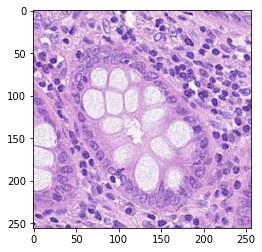

3 . cell count in the image,  {'T1': 0, 'T2': 59, 'T3': 63, 'T4': 16, 'T5': 1, 'T6': 41}


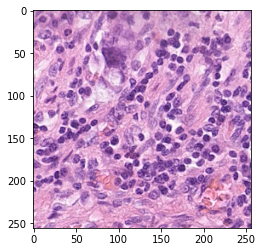

4 . cell count in the image,  {'T1': 0, 'T2': 0, 'T3': 107, 'T4': 17, 'T5': 0, 'T6': 72}


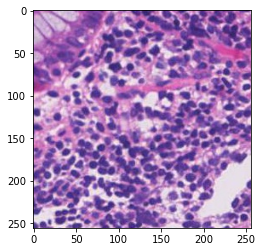

5 . cell count in the image,  {'T1': 0, 'T2': 5, 'T3': 177, 'T4': 5, 'T5': 0, 'T6': 35}


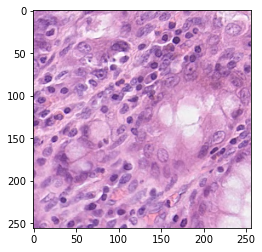

6 . cell count in the image,  {'T1': 0, 'T2': 45, 'T3': 25, 'T4': 20, 'T5': 3, 'T6': 45}


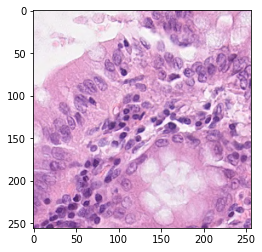

7 . cell count in the image,  {'T1': 0, 'T2': 53, 'T3': 23, 'T4': 21, 'T5': 0, 'T6': 23}


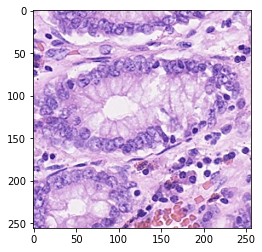

8 . cell count in the image,  {'T1': 0, 'T2': 91, 'T3': 27, 'T4': 3, 'T5': 4, 'T6': 21}


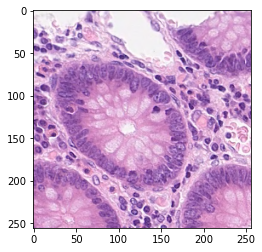

9 . cell count in the image,  {'T1': 2, 'T2': 85, 'T3': 36, 'T4': 14, 'T5': 2, 'T6': 32}


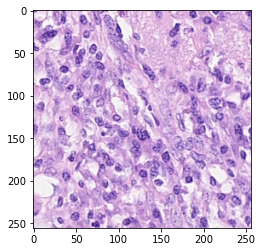

10 . cell count in the image,  {'T1': 0, 'T2': 1, 'T3': 38, 'T4': 32, 'T5': 0, 'T6': 65}


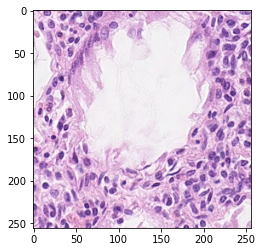

11 . cell count in the image,  {'T1': 1, 'T2': 10, 'T3': 45, 'T4': 30, 'T5': 3, 'T6': 34}


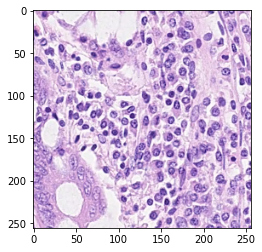

12 . cell count in the image,  {'T1': 0, 'T2': 18, 'T3': 83, 'T4': 38, 'T5': 0, 'T6': 40}


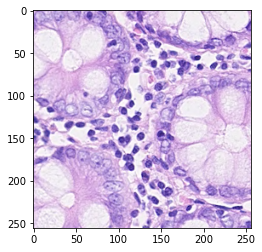

13 . cell count in the image,  {'T1': 0, 'T2': 60, 'T3': 37, 'T4': 14, 'T5': 0, 'T6': 17}


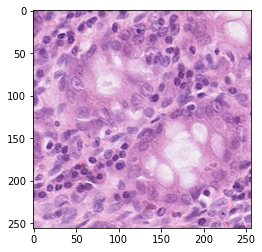

14 . cell count in the image,  {'T1': 0, 'T2': 41, 'T3': 33, 'T4': 19, 'T5': 2, 'T6': 45}


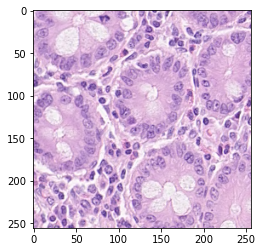

15 . cell count in the image,  {'T1': 1, 'T2': 79, 'T3': 29, 'T4': 14, 'T5': 6, 'T6': 40}


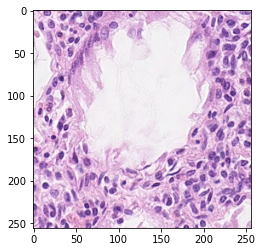

16 . cell count in the image,  {'T1': 1, 'T2': 10, 'T3': 45, 'T4': 30, 'T5': 3, 'T6': 34}


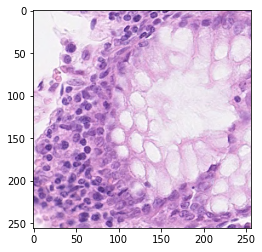

17 . cell count in the image,  {'T1': 0, 'T2': 37, 'T3': 42, 'T4': 12, 'T5': 1, 'T6': 10}


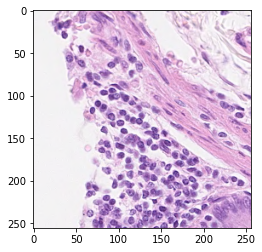

18 . cell count in the image,  {'T1': 0, 'T2': 5, 'T3': 78, 'T4': 17, 'T5': 0, 'T6': 28}


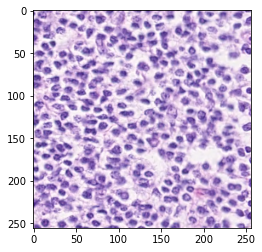

19 . cell count in the image,  {'T1': 0, 'T2': 0, 'T3': 196, 'T4': 0, 'T5': 0, 'T6': 40}


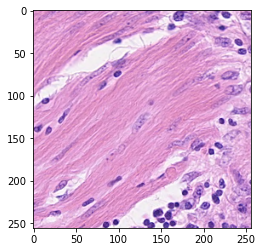

20 . cell count in the image,  {'T1': 0, 'T2': 0, 'T3': 21, 'T4': 2, 'T5': 0, 'T6': 27}


In [7]:
# show the 20 image examples and check how the images of cells relate to the cell counts of different types of cells

import matplotlib.pyplot as plt

n = 0
for i in value:
    plt.imshow(X[i])
    plt.show()

    t1 = T1[i]
    t2 = T2[i]
    t3 = T3[i]
    t4 = T4[i]
    t5 = T5[i]
    t6 = T6[i]
    example = {'T1': t1, 'T2': t2, 'T3': t3, 'T4': t4, 'T5': t5, 'T6': t6}
    n += 1
    print(n, ". cell count in the image, ", example)

A1.ii: Based on the limited number of examples, where all the T3 cell count larger than 20, there seems to be little or no T1 and T5 cells exist. Yet for our examples we can see T3 and T6 cells seem to always jointly occur in the images. Furthermore, according to the 2nd, 5th and 19th images,which contains very high density of T3 cells, there are intense deep purple cells, from which we can infer that T3 cells might look like those, and these purple cells always accompanied with pink tissues that might be T6 cells (also see the first example). For the examples where there are more T2 and T4 cells (e.g., the 3rd, 6th, 7th, 8th images), there are large scale of blank bubbish space in the images, thus it could be infer that T2 and T4 cells might relate to this.

Q1.iii: For each fold, plot the histogram of counts of each cell type separately (6 plots in total). How 
many images have counts within each of the following bins?

In [7]:
# get the indices for each fold 

idxFold1 = np.where(F == 1)
idxFold2 = np.where(F == 2)
idxFold3 = np.where(F == 3)

# split the cell count dataframe by fold

Y_Fold1 = Y.loc[idxFold1]
Y_Fold2 = Y.loc[idxFold2]
Y_Fold3 = Y.loc[idxFold3]

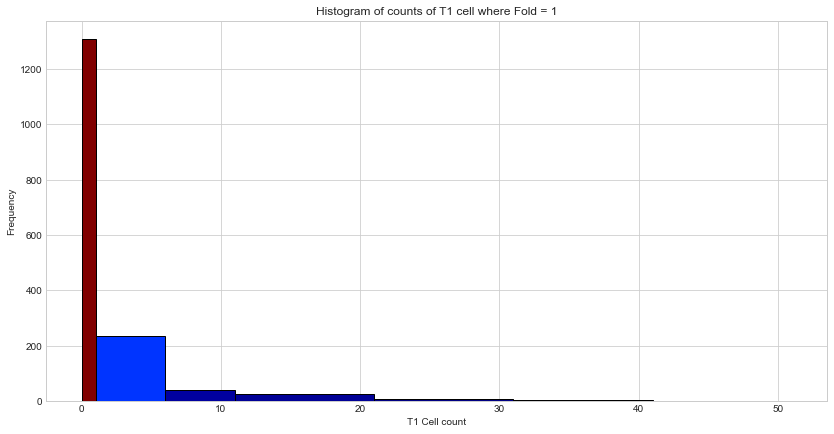

frequency of each range: [1308, 235, 40, 28, 7, 3, 1]


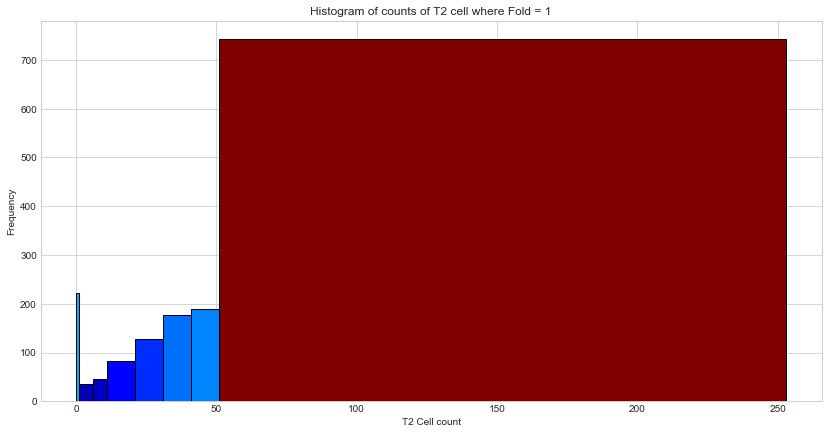

frequency of each range: [223, 35, 46, 82, 127, 176, 190, 743]


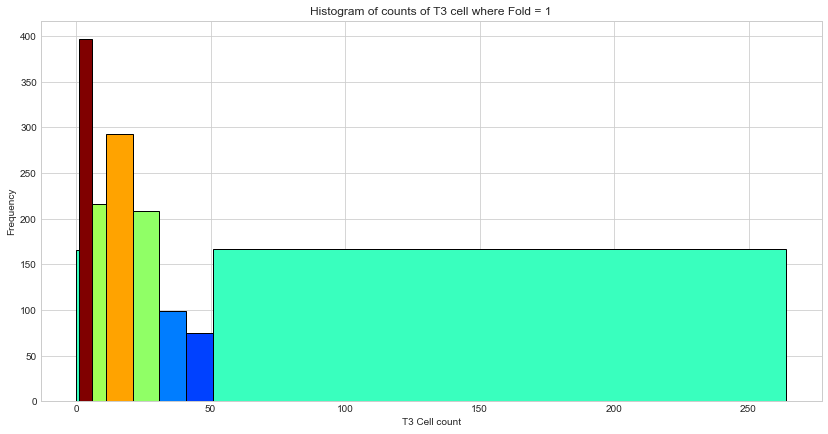

frequency of each range: [166, 397, 216, 293, 209, 99, 75, 167]


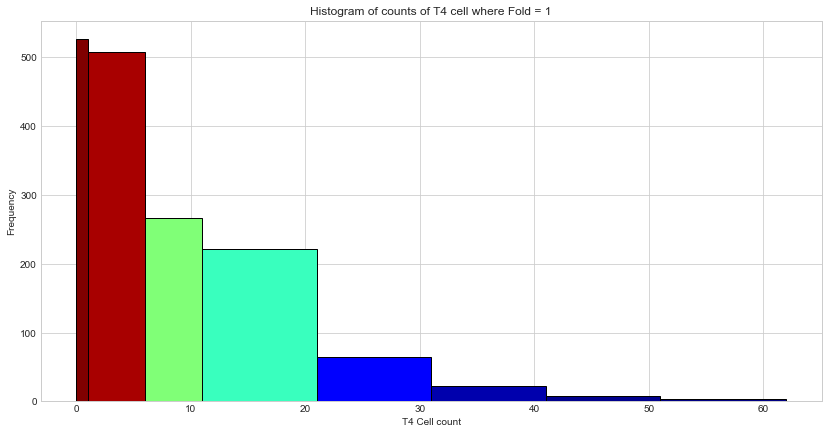

frequency of each range: [527, 508, 267, 222, 64, 22, 8, 4]


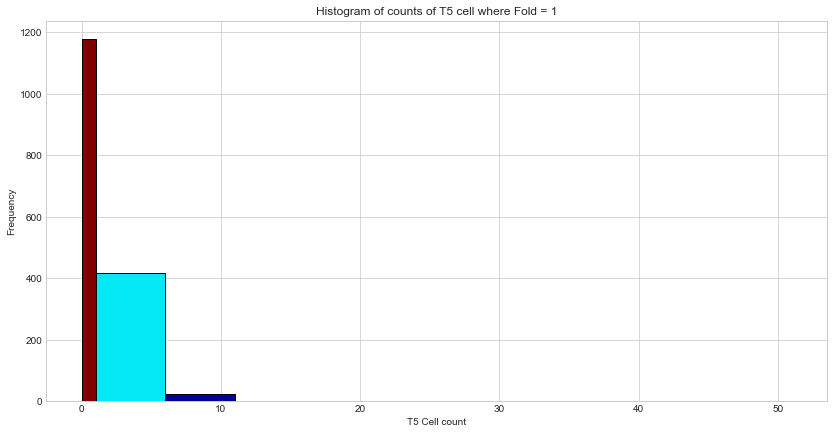

frequency of each range: [1179, 417, 25, 1, 0, 0, 0]


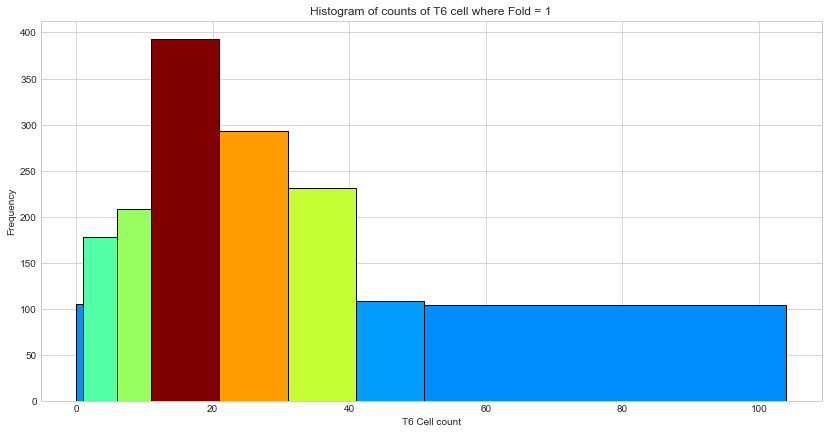

frequency of each range: [105, 178, 209, 393, 293, 231, 109, 104]


In [9]:
# plot the histogram for each cell type in the first fold

plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(Y_Fold1['T1'], bins = [0, 1, 6, 11, 21, 31, 41, 51], ec='black')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.jet(n[i]/max(n)))
plt.xlabel('T1 Cell count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of counts of T1 cell where Fold = 1')
plt.show()
print('frequency of each range:', [int(i) for i in n])


plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(Y_Fold1['T2'], bins = [0, 1, 6, 11, 21, 31, 41, 51, max(Y_Fold1['T2'])], ec='black') 
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.jet(n[i]/max(n)))
plt.xlabel('T2 Cell count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of counts of T2 cell where Fold = 1')
plt.show()
print('frequency of each range:', [int(i) for i in n])

plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(Y_Fold1['T3'], bins = [0, 1, 6, 11, 21, 31, 41, 51, max(Y_Fold1['T3'])], ec='black')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.jet(n[i]/max(n)))
plt.xlabel('T3 Cell count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of counts of T3 cell where Fold = 1')
plt.show()
print('frequency of each range:', [int(i) for i in n])

plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(Y_Fold1['T4'], bins = [0, 1, 6, 11, 21, 31, 41, 51, max(Y_Fold1['T4'])], ec='black') 
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.jet(n[i]/max(n)))
plt.xlabel('T4 Cell count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of counts of T4 cell where Fold = 1')
plt.show()
print('frequency of each range:', [int(i) for i in n])

plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(Y_Fold1['T5'], bins = [0, 1, 6, 11, 21, 31, 41, 51], ec='black') 
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.jet(n[i]/max(n)))
plt.xlabel('T5 Cell count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of counts of T5 cell where Fold = 1')
plt.show()
print('frequency of each range:', [int(i) for i in n])

plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(Y_Fold1['T6'], bins = [0, 1, 6, 11, 21, 31, 41, 51, max(Y_Fold1['T6'])], ec='black') 
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.jet(n[i]/max(n)))
plt.xlabel('T6 Cell count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of counts of T6 cell where Fold = 1')
plt.show()
print('frequency of each range:', [int(i) for i in n])

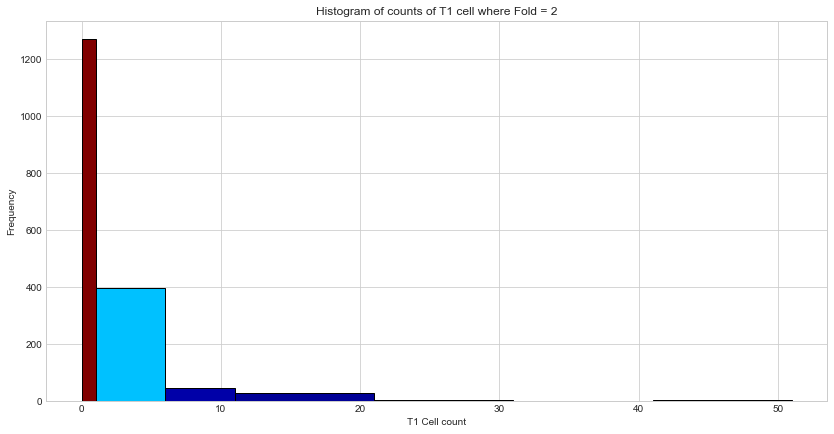

frequency of each range: [1271, 398, 48, 28, 3, 0, 3]


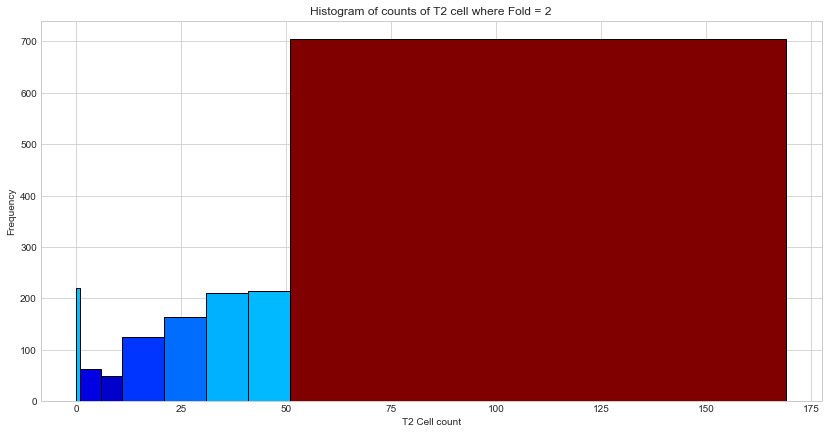

frequency of each range: [221, 62, 49, 125, 164, 210, 215, 705]


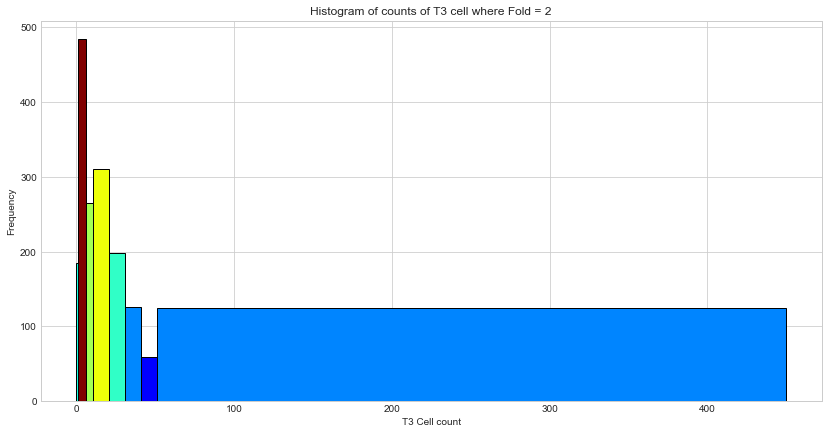

frequency of each range: [185, 484, 265, 310, 198, 126, 59, 124]


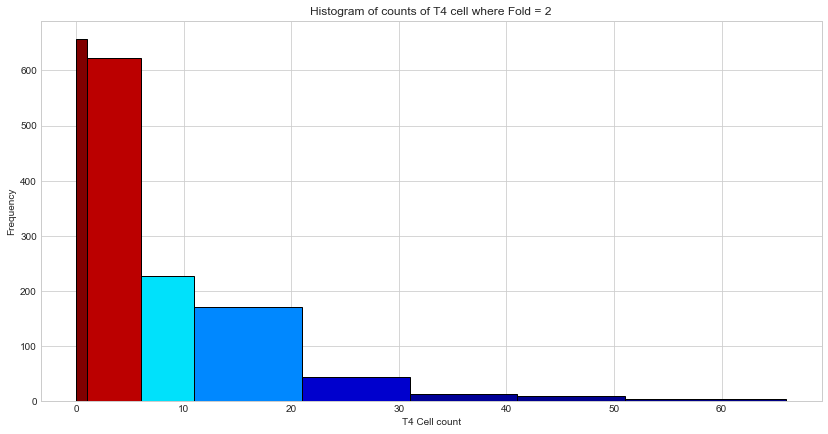

frequency of each range: [657, 623, 228, 171, 44, 14, 10, 4]


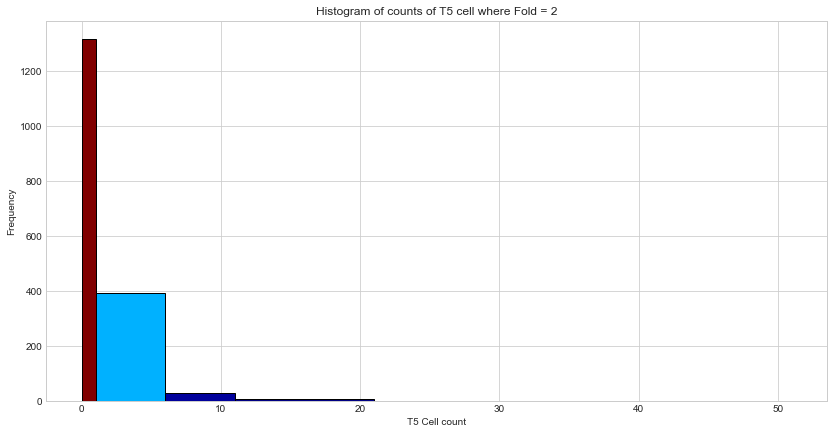

frequency of each range: [1316, 394, 31, 9, 1, 0, 0]


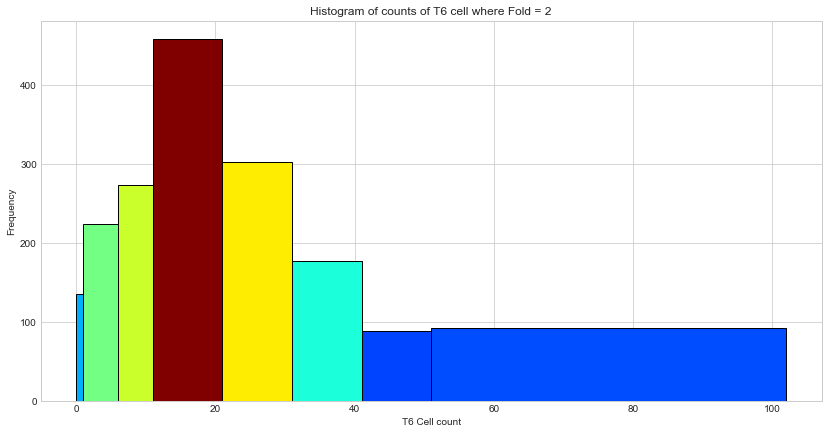

frequency of each range: [135, 224, 273, 458, 302, 177, 89, 93]


In [10]:
# plot the histogram for each cell type in the second fold

plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(Y_Fold2['T1'], bins = [0, 1, 6, 11, 21, 31, 41, 51], ec='black') 
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.jet(n[i]/max(n)))
plt.xlabel('T1 Cell count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of counts of T1 cell where Fold = 2')
plt.show()
print('frequency of each range:', [int(i) for i in n])

plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(Y_Fold2['T2'], bins = [0, 1, 6, 11, 21, 31, 41, 51, max(Y_Fold2['T2'])], ec='black') 
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.jet(n[i]/max(n)))
plt.xlabel('T2 Cell count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of counts of T2 cell where Fold = 2')
plt.show()
print('frequency of each range:', [int(i) for i in n])

plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(Y_Fold2['T3'], bins = [0, 1, 6, 11, 21, 31, 41, 51, max(Y_Fold2['T3'])], ec='black') 
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.jet(n[i]/max(n)))
plt.xlabel('T3 Cell count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of counts of T3 cell where Fold = 2')
plt.show()
print('frequency of each range:', [int(i) for i in n])

plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(Y_Fold2['T4'], bins = [0, 1, 6, 11, 21, 31, 41, 51, max(Y_Fold2['T4'])], ec='black') 
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.jet(n[i]/max(n)))
plt.xlabel('T4 Cell count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of counts of T4 cell where Fold = 2')
plt.show()
print('frequency of each range:', [int(i) for i in n])

plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(Y_Fold2['T5'], bins = [0, 1, 6, 11, 21, 31, 41, 51], ec='black') 
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.jet(n[i]/max(n)))
plt.xlabel('T5 Cell count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of counts of T5 cell where Fold = 2')
plt.show()
print('frequency of each range:', [int(i) for i in n])

plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(Y_Fold2['T6'], bins = [0, 1, 6, 11, 21, 31, 41, 51, max(Y_Fold2['T6'])], ec='black') 
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.jet(n[i]/max(n)))
plt.xlabel('T6 Cell count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of counts of T6 cell where Fold = 2')
plt.show()
print('frequency of each range:', [int(i) for i in n])

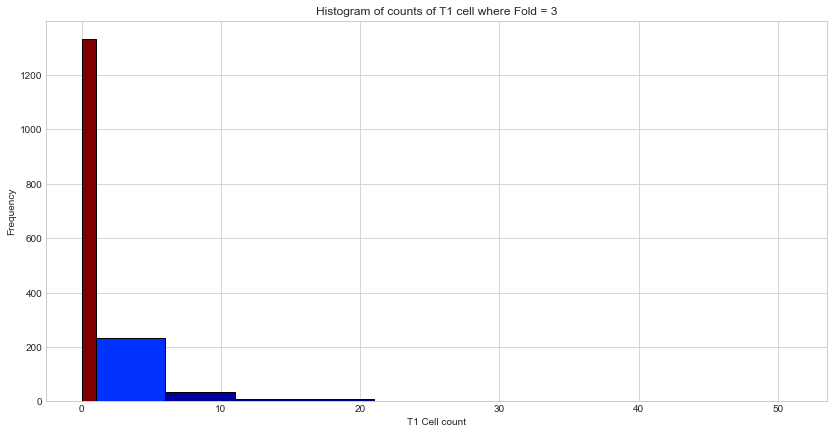

frequency of each range: [1333, 234, 33, 8, 0, 0, 0]


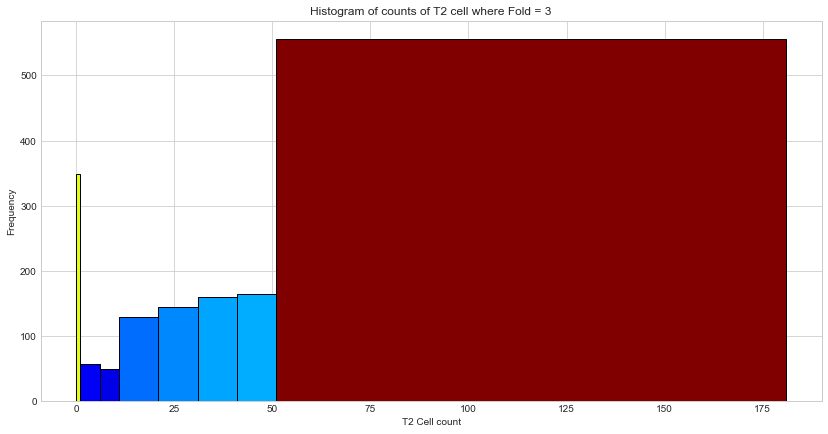

frequency of each range: [348, 57, 50, 129, 144, 160, 164, 556]


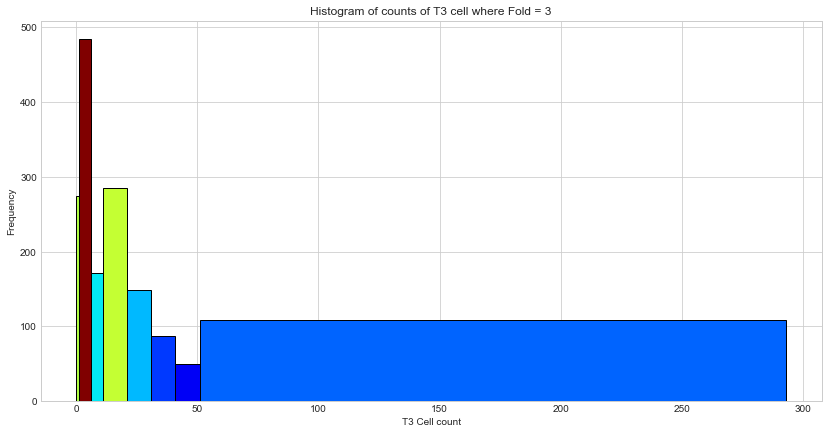

frequency of each range: [274, 484, 171, 285, 149, 87, 50, 108]


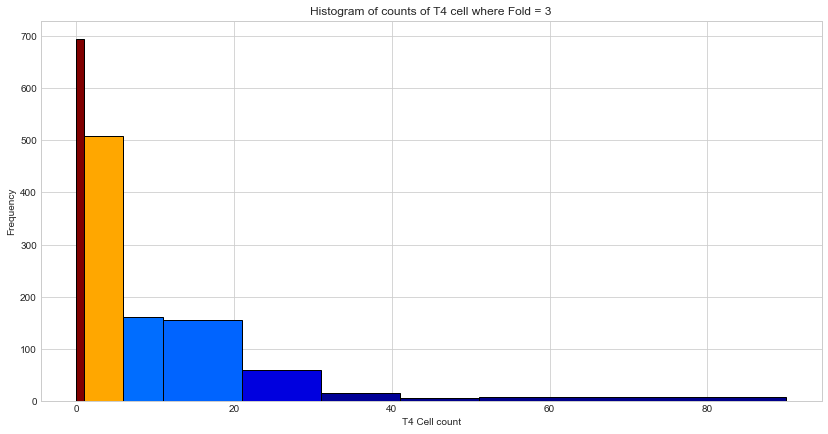

frequency of each range: [694, 508, 161, 156, 59, 15, 7, 8]


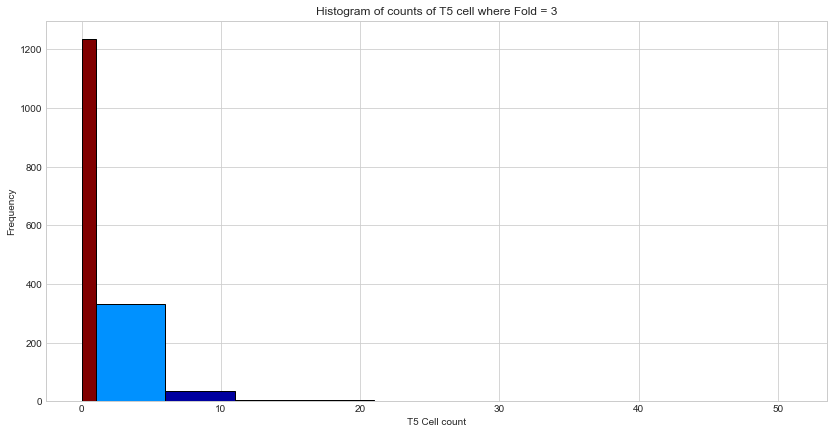

frequency of each range: [1236, 331, 35, 6, 0, 0, 0]


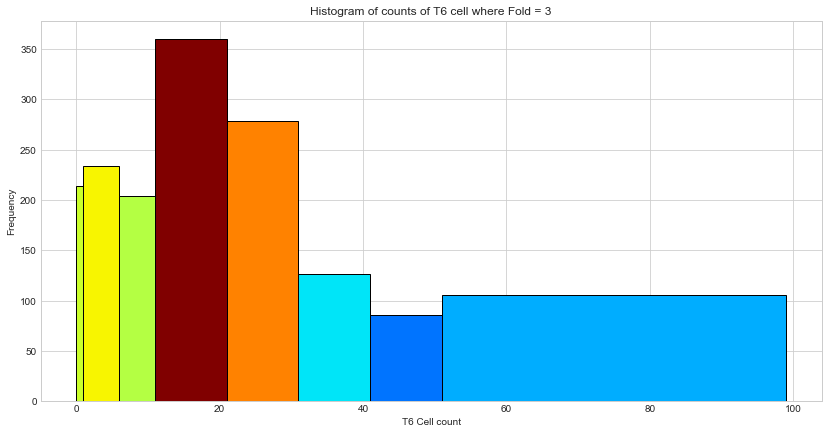

frequency of each range: [214, 234, 204, 360, 278, 126, 86, 106]


In [11]:
# plot the histogram for each cell type in the third fold

plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(Y_Fold3['T1'], bins = [0, 1, 6, 11, 21, 31, 41, 51], ec='black') 
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.jet(n[i]/max(n)))
plt.xlabel('T1 Cell count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of counts of T1 cell where Fold = 3')
plt.show()
print('frequency of each range:', [int(i) for i in n])

plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(Y_Fold3['T2'], bins = [0, 1, 6, 11, 21, 31, 41, 51, max(Y_Fold3['T2'])], ec='black') 
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.jet(n[i]/max(n)))
plt.xlabel('T2 Cell count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of counts of T2 cell where Fold = 3')
plt.show()
print('frequency of each range:', [int(i) for i in n])

plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(Y_Fold3['T3'], bins = [0, 1, 6, 11, 21, 31, 41, 51, max(Y_Fold3['T3'])], ec='black') 
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.jet(n[i]/max(n)))
plt.xlabel('T3 Cell count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of counts of T3 cell where Fold = 3')
plt.show()
print('frequency of each range:', [int(i) for i in n])

plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(Y_Fold3['T4'], bins = [0, 1, 6, 11, 21, 31, 41, 51, max(Y_Fold3['T4'])], ec='black') 
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.jet(n[i]/max(n)))
plt.xlabel('T4 Cell count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of counts of T4 cell where Fold = 3')
plt.show()
print('frequency of each range:', [int(i) for i in n])

plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(Y_Fold3['T5'], bins = [0, 1, 6, 11, 21, 31, 41, 51], ec='black') 
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.jet(n[i]/max(n)))
plt.xlabel('T5 Cell count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of counts of T5 cell where Fold = 3')
plt.show()
print('frequency of each range:', [int(i) for i in n])

plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(Y_Fold3['T6'], bins = [0, 1, 6, 11, 21, 31, 41, 51, max(Y_Fold3['T6'])], ec='black') 
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.jet(n[i]/max(n)))
plt.xlabel('T6 Cell count', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of counts of T6 cell where Fold = 3')
plt.show()
print('frequency of each range:', [int(i) for i in n])

A1.iii:

Q1.iv: Pre-processing: Convert and show a few images from RGB space to HED space and show the 
H-channel which should indicate cellular nuclei. For this purpose, you can use the color 
separation notebook available here: https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_ihc_color_separation.html

In [3]:
from skimage.color import rgb2hed, hed2rgb

# Convert the image from rgb to hed space

X_hed = np.array([rgb2hed(X[i]) for i in range(len(X))])

In [4]:
# Create an RGB image for H-channel

X_h = []
for i in range(len(X)):
    image = X_hed[i]
    null = np.zeros_like(image[:, :, 0])
    h_image = hed2rgb(np.stack((image[:, :, 0], null, null), axis = -1))
    X_h.append(h_image)

X_h = np.array(X_h)

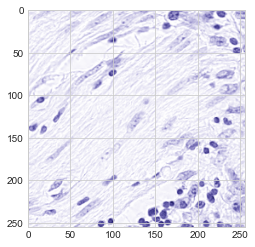

1 . cell count in the image after color separation: H-channel,  {'T1': 0, 'T2': 0, 'T3': 21, 'T4': 2, 'T5': 0, 'T6': 27}


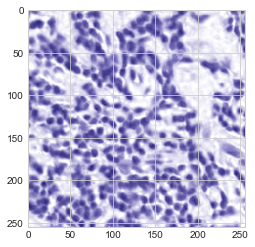

2 . cell count in the image after color separation: H-channel,  {'T1': 0, 'T2': 0, 'T3': 184, 'T4': 6, 'T5': 0, 'T6': 22}


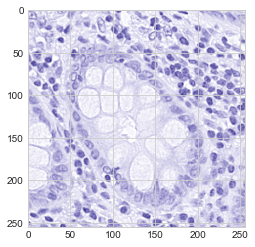

3 . cell count in the image after color separation: H-channel,  {'T1': 0, 'T2': 59, 'T3': 63, 'T4': 16, 'T5': 1, 'T6': 41}


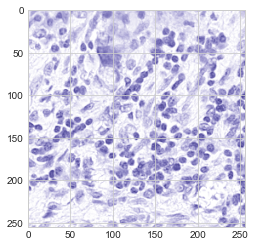

4 . cell count in the image after color separation: H-channel,  {'T1': 0, 'T2': 0, 'T3': 107, 'T4': 17, 'T5': 0, 'T6': 72}


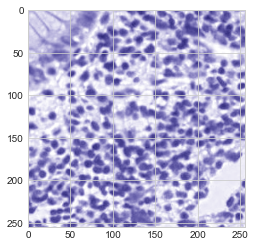

5 . cell count in the image after color separation: H-channel,  {'T1': 0, 'T2': 5, 'T3': 177, 'T4': 5, 'T5': 0, 'T6': 35}


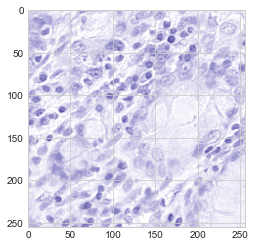

6 . cell count in the image after color separation: H-channel,  {'T1': 0, 'T2': 45, 'T3': 25, 'T4': 20, 'T5': 3, 'T6': 45}


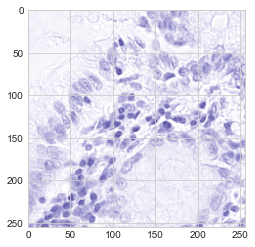

7 . cell count in the image after color separation: H-channel,  {'T1': 0, 'T2': 53, 'T3': 23, 'T4': 21, 'T5': 0, 'T6': 23}


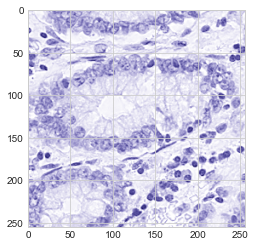

8 . cell count in the image after color separation: H-channel,  {'T1': 0, 'T2': 91, 'T3': 27, 'T4': 3, 'T5': 4, 'T6': 21}


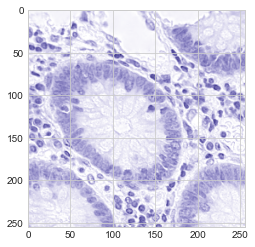

9 . cell count in the image after color separation: H-channel,  {'T1': 2, 'T2': 85, 'T3': 36, 'T4': 14, 'T5': 2, 'T6': 32}


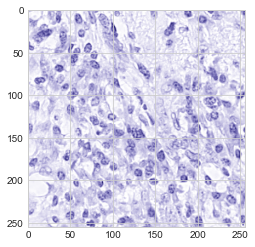

10 . cell count in the image after color separation: H-channel,  {'T1': 0, 'T2': 1, 'T3': 38, 'T4': 32, 'T5': 0, 'T6': 65}


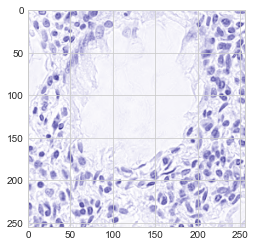

11 . cell count in the image after color separation: H-channel,  {'T1': 1, 'T2': 10, 'T3': 45, 'T4': 30, 'T5': 3, 'T6': 34}


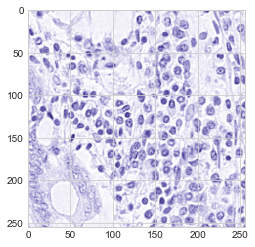

12 . cell count in the image after color separation: H-channel,  {'T1': 0, 'T2': 18, 'T3': 83, 'T4': 38, 'T5': 0, 'T6': 40}


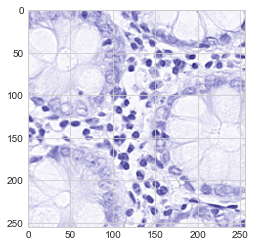

13 . cell count in the image after color separation: H-channel,  {'T1': 0, 'T2': 60, 'T3': 37, 'T4': 14, 'T5': 0, 'T6': 17}


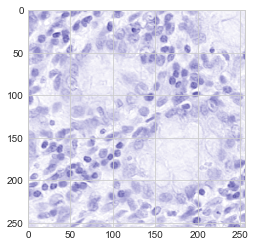

14 . cell count in the image after color separation: H-channel,  {'T1': 0, 'T2': 41, 'T3': 33, 'T4': 19, 'T5': 2, 'T6': 45}


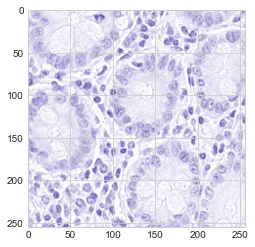

15 . cell count in the image after color separation: H-channel,  {'T1': 1, 'T2': 79, 'T3': 29, 'T4': 14, 'T5': 6, 'T6': 40}


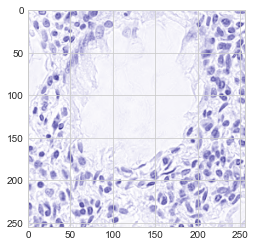

16 . cell count in the image after color separation: H-channel,  {'T1': 1, 'T2': 10, 'T3': 45, 'T4': 30, 'T5': 3, 'T6': 34}


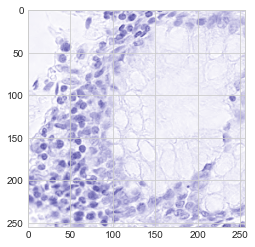

17 . cell count in the image after color separation: H-channel,  {'T1': 0, 'T2': 37, 'T3': 42, 'T4': 12, 'T5': 1, 'T6': 10}


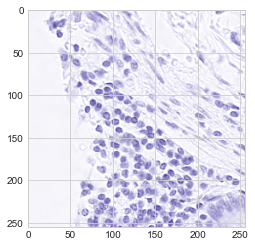

18 . cell count in the image after color separation: H-channel,  {'T1': 0, 'T2': 5, 'T3': 78, 'T4': 17, 'T5': 0, 'T6': 28}


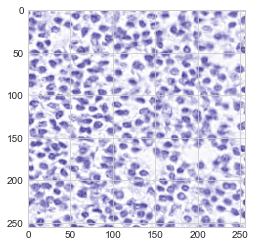

19 . cell count in the image after color separation: H-channel,  {'T1': 0, 'T2': 0, 'T3': 196, 'T4': 0, 'T5': 0, 'T6': 40}


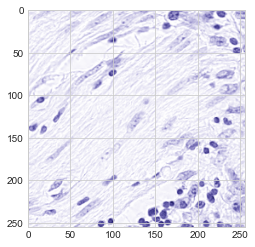

20 . cell count in the image after color separation: H-channel,  {'T1': 0, 'T2': 0, 'T3': 21, 'T4': 2, 'T5': 0, 'T6': 27}


In [14]:
# print the example images as presented in the H-channel

n = 0
for i in value:
    plt.imshow(X_h[i])
    plt.show()

    t1 = T1[i]
    t2 = T2[i]
    t3 = T3[i]
    t4 = T4[i]
    t5 = T5[i]
    t6 = T6[i]
    example = {'T1': t1, 'T2': t2, 'T3': t3, 'T4': t4, 'T5': t5, 'T6': t6}
    n += 1
    print(n, ". cell count in the image after color separation: H-channel, ", example)

Q1.v: Do a scatter plot of the average of the H-channel for each image vs. its cell count of a certain 
type for images in Fold-1 (6 plots in total). Do you think this feature would be useful in your 
regression model? Explain your reasoning.

In [5]:
# get the average for each image in the H-channel

X_H = np.array([i[:,:,0] for i in X_hed]) 

X_h_avg = []
for i in X_H:
    avg = np.mean(i)
    X_h_avg.append(avg)
X_h_avg = np.array(X_h_avg)

In [8]:
# extract the H-channel image means for the first fold

X_h_avg_Fold1 = X_h_avg[idxFold1]

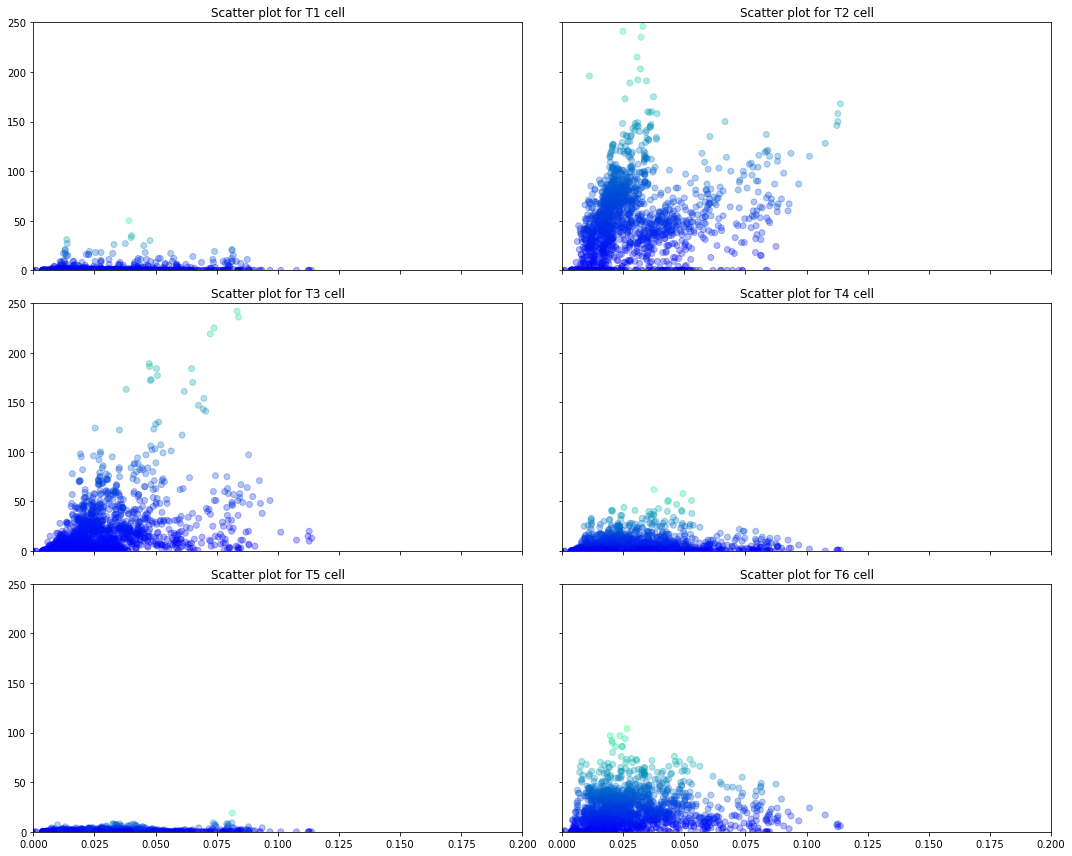

In [20]:
# plot the scatter plot

fig, axes = plt.subplots(3, 2, figsize = (15, 12), sharex = True, sharey = True)
ax = axes.ravel()

ax[0].scatter(X_h_avg_Fold1, Y_Fold1['T1'], alpha = 0.3, c = Y_Fold1['T1'], cmap = 'winter')
ax[0].set_title("Scatter plot for T1 cell")

ax[1].scatter(X_h_avg_Fold1, Y_Fold1['T2'], alpha = 0.3, c = Y_Fold1['T2'], cmap = 'winter')
ax[1].set_title("Scatter plot for T2 cell")

ax[2].scatter(X_h_avg_Fold1, Y_Fold1['T3'], alpha = 0.3, c = Y_Fold1['T3'], cmap = 'winter')
ax[2].set_title("Scatter plot for T3 cell")

ax[3].scatter(X_h_avg_Fold1, Y_Fold1['T4'], alpha = 0.3, c = Y_Fold1['T4'], cmap = 'winter')
ax[3].set_title("Scatter plot for T4 cell")

ax[4].scatter(X_h_avg_Fold1, Y_Fold1['T5'], alpha = 0.3, c = Y_Fold1['T5'], cmap = 'winter')
ax[4].set_title("Scatter plot for T5 cell")

ax[5].scatter(X_h_avg_Fold1, Y_Fold1['T6'], alpha = 0.3, c = Y_Fold1['T6'], cmap = 'winter')
ax[5].set_title("Scatter plot for T6 cell")

for a in ax.ravel():
    a.set_xlim([0,0.2])
    a.set_ylim([0,250])

fig.tight_layout()


A1.v: These scatter plots display the pattern of average of the H-channel vs cell count in the first fold of the image. From these plots, we can see that there exist some trends within the data, especially for the T2, T3 type of cells. Whereas for other cell type, the trends are not displayed very clearly. For the T2, T3 cells particularly, we can see there might be a linear association between the cell count and the mean of H-channel. Thus this might be useful to form a linear prediction between the image data and cell count. Yet there also exists high variance in the data, as displayed by the level of dispersion of the data point. Thus this might be an issue to consider when forming the linear regression model.

Q1.vi: What performance metrics can you use for this problem? Which one will be the best 
performance metric for this problem? Please give reasoning.

A1.vi: for a regression problem, the commonly used performance metrics are:

- Mean Squared error(MSE) - The sum of the squares of the difference between original and predicted values. This is very sensitive to outliers due to the squaring of the difference.
- Root Mean Squared error - The square root of MSE. The lesser RMSE is, the better we achieve the prediction.
- R^2 score - normalised version of MSE in the range -∞ to 1. Gives a ratio of the extent to which to the predicted values explain the true values, which means R2 is more suitable for measuring how well future outcomes can be predicted by the model. R2 noramlly scales from range 0 to 1, higher R2 score suggests better performance.

In this case, we are trying to find out how well a model that could fit the data, so using R2 for evaluation metric will be better, followed by RMSE.


### Question 2: Feature Extraction and Classical Regression

#### For the following questions, use only T3 type of cells as the output prediction variable.

In [18]:
# use only T3 type of cells as the prediction variable

Y_T3 = pd.DataFrame(T3, columns = ['T3'], dtype = float)
Y_T3.head()

T3
0  0.0
1  1.0
2  3.0
3  0.0
4  7.0

Q2.i: Extract features from a given image. Specifically, calculate the:

a. average of the “H”, red, green and blue channels

b. variance of the “H”, red, green and blue channels

c. entropy of the “H”, red, green and blue channels

d. Any other features that you think can be useful for this work. Describe your 
reasoning for using these features. 

HINT/Suggestion: You may want to use PCA Coefficients of image data (you may want to use randomized PCA or incremental PCA, see: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). 

In case of computational complexity, you can reduce the number of images being used in determining the PCA basis. You can also look at other features such as GLCM features (https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_glcm.html) or transfer learning features. You can resize the images if needed. 

Plot the scatter plot and calculate the correlation coefficient of each feature in Q(2i,a-c) you obtain vs. the target variable (cell count) across all images. Which features do you think are important? Give your reasoning. 

In [19]:
# Separate the channels from rgb

X_r = np.array([i[:,:,0] for i in X])
X_g = np.array([i[:,:,1] for i in X])
X_b = np.array([i[:,:,2] for i in X])

In [20]:
# Preprocessing: define a function to rescale each image data to range(-1,1)

from sklearn.preprocessing import MaxAbsScaler

def rescale_img(X):
    Scaler = MaxAbsScaler()
    X_flat = np.array([img.ravel() for img in X]) # flatten the array for rescaling
    X_rescaled = Scaler.fit_transform(X_flat) # rescale the image data to range(-1,1)

    return X_rescaled

In [21]:
# define a function to calculate the statistical results

from skimage.measure import shannon_entropy

def calculate_features(X):
    results = []
    for i in X:
        avg = np.mean(i)
        var = np.var(i)
        etp = shannon_entropy(i.ravel())
        results_dict = {"avg": avg, "var": var, "etp": etp}
        results.append(results_dict)
    results = pd.DataFrame(results, dtype = float)

    return results

In [22]:
# calclate the features for h,r,g,b channels

X_H_rescaled = rescale_img(X_H)
H = calculate_features(X_H_rescaled)

X_r_rescaled = rescale_img(X_r)
R = calculate_features(X_r_rescaled)

X_g_rescaled = rescale_img(X_g)
G = calculate_features(X_g_rescaled)

X_b_rescaled = rescale_img(X_b)
B = calculate_features(X_b_rescaled)

In [23]:
# randomised PCA

from sklearn.decomposition import PCA

def get_PCA(X):
    pca = PCA(n_components = 1, svd_solver = 'randomized')
    PCA_1 = pca.fit_transform(X)
    PCA_results = pd.DataFrame(PCA_1, columns = ['PCA'])
    
    return PCA_results

In [24]:
# get the PCA results for each channel

H_PCA = get_PCA(X_H_rescaled)
R_PCA = get_PCA(X_r_rescaled)
G_PCA = get_PCA(X_g_rescaled)
B_PCA = get_PCA(X_b_rescaled)


In [25]:
# define a function to plot the scatterplot

import seaborn as sns

def scatterplot(data, name, color):
        data = pd.DataFrame(data)
        cols = [i for i in data.columns]
        length = int(len(cols))
        if length > 1:
                fig, ax = plt.subplots(1, length, figsize=(length*6, 6))
                ax[0].set_ylabel('Cell Count')
                for i in range(length):
                        sns.scatterplot(x = data[cols[i]], y = Y_T3['T3'], ax=ax[i], alpha = 0.3, color = color)
                        ax[i].set_title('Scatterplot for the ' + name + ' feature', fontsize = 13) 

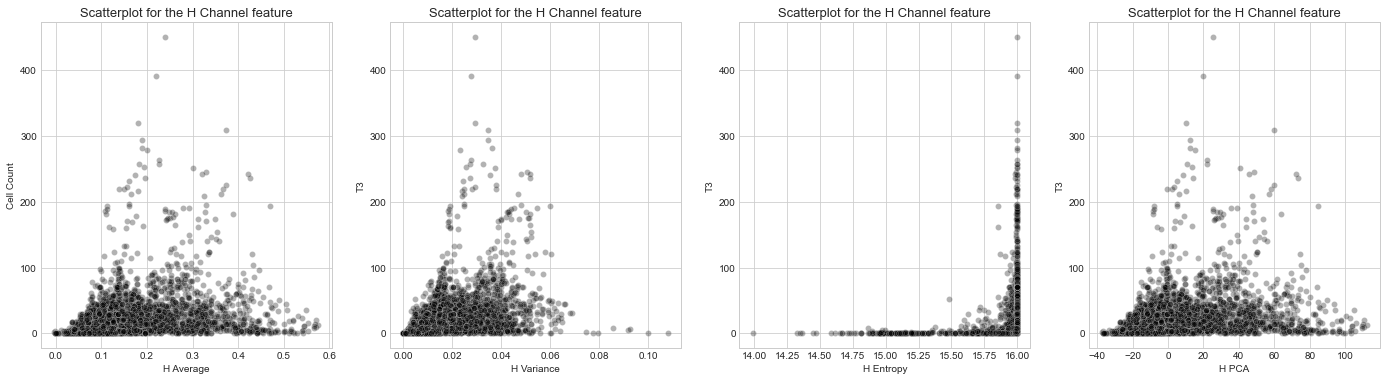

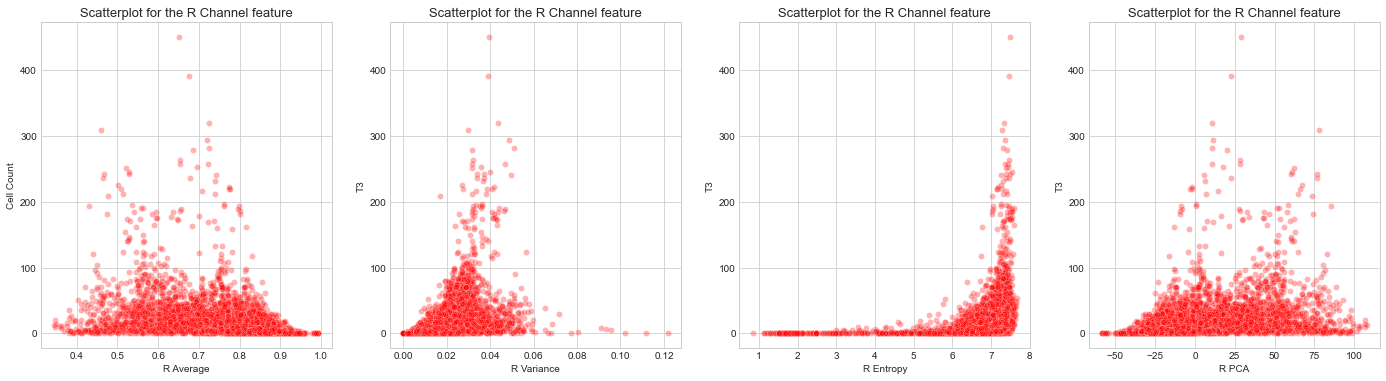

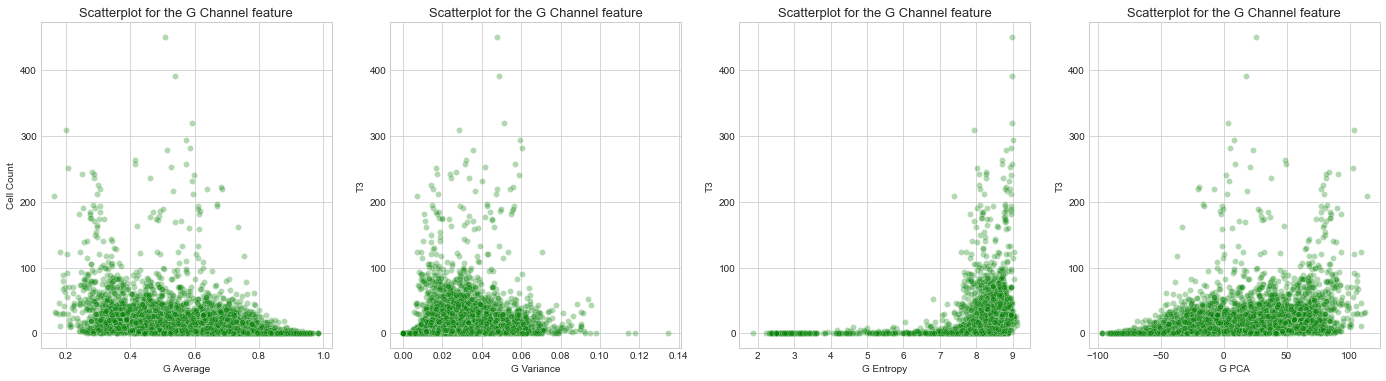

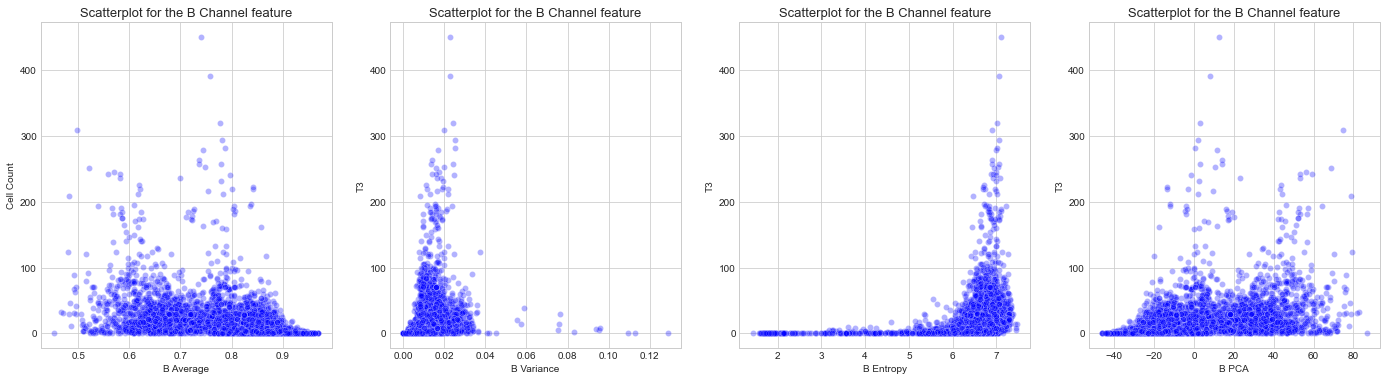

In [26]:
# plot the scatter plot for the average, variance, entropy features of each channel

H_features = pd.concat([H, H_PCA], axis = 1)
H_features = H_features.rename({'avg': 'H Average', 'var': 'H Variance', 'etp': 'H Entropy', 'PCA': 'H PCA'}, axis = 'columns')

R_features = pd.concat([R, R_PCA], axis = 1)
R_features = R_features.rename({'avg': 'R Average', 'var': 'R Variance', 'etp': 'R Entropy', 'PCA': 'R PCA'}, axis = 'columns')

G_features = pd.concat([G, G_PCA], axis = 1)
G_features = G_features.rename({'avg': 'G Average', 'var': 'G Variance', 'etp': 'G Entropy', 'PCA': 'G PCA'}, axis = 'columns')

B_features = pd.concat([B, B_PCA], axis = 1)
B_features = B_features.rename({'avg': 'B Average', 'var': 'B Variance', 'etp': 'B Entropy', 'PCA': 'B PCA'}, axis = 'columns')

scatterplot(H_features, 'H Channel', 'black')
scatterplot(R_features, 'R Channel', 'red')
scatterplot(G_features, 'G Channel', 'green')
scatterplot(B_features, 'B Channel', 'blue')

In [27]:
# merge all the features into 1 dataframe

results = pd.concat([H_features, R_features, G_features, B_features], axis=1) 

results.head()

H Average  H Variance  H Entropy     H PCA  R Average  R Variance  \
0   0.144820    0.013485  15.999245  0.997148   0.775287    0.020474   
1   0.132127    0.013968  15.998039 -2.272688   0.794013    0.021799   
2   0.147557    0.015457  15.994073  1.831272   0.773916    0.023675   
3   0.121241    0.013183  15.995365 -5.049970   0.807823    0.022087   
4   0.168709    0.012562  15.998167  7.158204   0.738723    0.018970   

   R Entropy      R PCA  G Average  G Variance  G Entropy      G PCA  \
0   7.063311  -2.730955   0.668002    0.028952   8.587547 -15.848050   
1   6.976390  -7.558745   0.692923    0.033623   8.511091 -22.259394   
2   6.973113  -2.274953   0.668512    0.035604   8.402035 -15.848686   
3   6.846146 -11.046329   0.709715    0.037637   8.401885 -26.526417   
4   7.107354   6.668945   0.606746    0.025361   8.575302  -0.113532   

   B Average  B Variance  B Entropy      B PCA  
0   0.864555    0.007413   6.344929 -19.162801  
1   0.873952    0.007838   6.295099 -21.582138  
2   0.862993    0.008239   6.306477 -18.730718  
3   0.878354    0.007899   6.219650 -22.690996  
4   0.839980    0.008259   6.480956 -12.867448

In [28]:
# calculating pearson correlation coefficients

from scipy.stats import pearsonr

cols = [i for i in results.columns]
coef = []
for i in cols:
    x = results[i]
    y = Y_T3['T3']
    r = pearsonr(x, y)
    coef.append((i, r[0]))

# print the coefficients

print('A2.i: ')
for i in coef:
    print(i[0], ':', '{0:.2f}'.format(i[1]))

A2.i: 
H Average : 0.33
H Variance : 0.44
H Entropy : 0.12
H PCA : 0.33
R Average : -0.36
R Variance : 0.40
R Entropy : 0.32
R PCA : 0.36
G Average : -0.39
G Variance : 0.13
G Entropy : 0.22
G PCA : 0.39
B Average : -0.38
B Variance : 0.24
B Entropy : 0.29
B PCA : 0.38


A2.i: The Pearson correlation coefficients provide us some information for evaluating the features. Pearson correlation coefficient is a measure of the strength of a linear correlation between two variables, range from -1 to 1. The higher the absolute value of Pearson's r, the stronger the linear relationship is. Specifically, the coefficients, in general, demonstrate a weak correlation (absolute value less than 0.5) between the features and T3 cell count. We can see that 4 features: variance of the H-channel, Variance of the R-channel, average of the G-channel, PCA coefficients of the G-channel, average of the B-channel and PCA coefficients of the B-channel, have the Pearson correlation coefficient greater than, or close to 0.4. Thus these features might be important.

Q2.ii: Try the following regression models with the features used in part-I. Plot the scatter plot between true and predicted counts for each type of regression model for the test data. 

Also, report your prediction performance in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) on the test data.

a. Ordinary Least Squares (OLS) regression

b. Support Vector Regression OR Multilayer Perceptron (MLP) OR Both

In [29]:
# split the train and test dataset

train_idx = np.where(F < 3)
test_idx = np.where(F == 3)

X_train = results.iloc[train_idx]
X_test = results.iloc[test_idx]
Y_train = Y_T3.iloc[train_idx].to_numpy(dtype = 'float')
Y_test = Y_T3.iloc[test_idx]

Q2.ii.a: Ordinary Least Squares regression

In [30]:
# Grid search for the optimal parameters in OLS regression model

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

params_grid={'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
lr = LinearRegression()
Grid_search = GridSearchCV(lr, params_grid)
Grid_search.fit(X_train, Y_train)

Grid_search.best_score_
Grid_search.best_params_
Grid_search.best_estimator_

print(Grid_search.best_score_)
print(Grid_search.best_params_)
print(Grid_search.best_estimator_)

C:\Users\78336\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\78336\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

0.15723064887867538
{'copy_X': True, 'fit_intercept': False, 'normalize': True}
LinearRegression(fit_intercept=False, normalize=True)


C:\Users\78336\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\78336\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\78336\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

In [31]:
# fitting OLS regression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr
from math import sqrt

LR = LinearRegression(fit_intercept=False, normalize=True).fit(X_train, Y_train)
Y_pred_LR = LR.predict(X_test)

Y_pred_LR = pd.DataFrame(Y_pred_LR)

R2 = r2_score(Y_test, Y_pred_LR)
RMSE = sqrt(mean_squared_error(Y_test, Y_pred_LR))
Pearson_R = pearsonr(Y_test['T3'], Y_pred_LR[0])
Spearman_R = spearmanr(Y_test, Y_pred_LR)

print('R2 score:', R2)
print('Root mean squared error:', RMSE)
print('Pearson correlation coefficient:', Pearson_R[0])
print('Spearman correlation coefficient:', Spearman_R[0])


R2 score: 0.23388179112163499
Root mean squared error: 25.863260806555783
Pearson correlation coefficient: 0.5454774477375824
Spearman correlation coefficient: 0.6251887338666323


C:\Users\78336\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Counts')

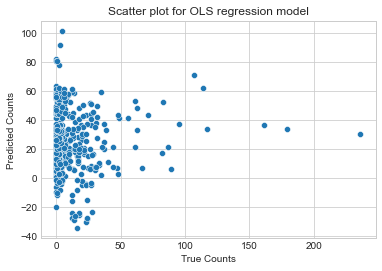

In [32]:
# plotting the predicted count vs true count for OLS linear regression

sns.scatterplot(Y_test['T3'], Y_pred_LR[0]).set(title = 'Scatter plot for OLS regression model')
plt.xlabel("True Counts")
plt.ylabel("Predicted Counts")

Q2.ii.b: Support Vector Regression

In [33]:
# grid search for the optimal parameters for support vector regression

from sklearn.svm import SVR

params_grid={'C': [1e-4, 1e-3, 1e-2, 1e-1, 1], 'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5], 'kernel': ['poly', 'rbf', 'linear']}

svr = SVR()
Grid_search = GridSearchCV(svr, params_grid)
Grid_search.fit(X_train, Y_train)

Grid_search.best_score_
Grid_search.best_params_
Grid_search.best_estimator_

print(Grid_search.best_score_)
print(Grid_search.best_params_)
print(Grid_search.best_estimator_)

C:\Users\78336\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\78336\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\78336\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\78336\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

0.018573004312721287
{'C': 1, 'epsilon': 0.3, 'kernel': 'linear'}
SVR(C=1, epsilon=0.3, kernel='linear')


In [34]:
# fitting support vector regression

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

SVR_linear = make_pipeline(StandardScaler(), SVR(C=1, epsilon=0.3, kernel='linear'))
SVR_linear.fit(X_train, Y_train)
Y_pred_SVR = SVR_linear.predict(X_test)

Y_pred_SVR = pd.DataFrame(Y_pred_SVR)

R2 = r2_score(Y_test, Y_pred_SVR)
RMSE = sqrt(mean_squared_error(Y_test, Y_pred_SVR))
Pearson_R = pearsonr(Y_test['T3'], Y_pred_SVR[0])
Spearman_R = spearmanr(Y_test, Y_pred_SVR)

print('R2 score:', R2)
print('Root mean squared error:', RMSE)
print('Pearson correlation coefficient:', Pearson_R[0])
print('Spearman correlation coefficient:', Spearman_R[0])

C:\Users\78336\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score: 0.2875688349687058
Root mean squared error: 24.940596808556567
Pearson correlation coefficient: 0.536909916401515
Spearman correlation coefficient: 0.6540655221295243


C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Counts')

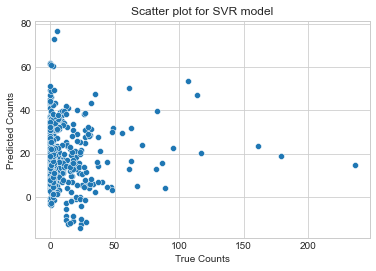

In [35]:
# plotting the predicted count vs true count for support vector regression

sns.scatterplot(Y_test['T3'], Y_pred_SVR[0]).set(title = 'Scatter plot for SVR model')
plt.xlabel("True Counts")
plt.ylabel("Predicted Counts")

Q2.ii.b: Multilayer Perceptron

In [36]:
# standardise the data for Multilayer Perceptron

Std_Scaler = StandardScaler()

X_train_std = Std_Scaler.fit_transform(X_train)
Y_train_std = Std_Scaler.fit_transform(Y_train)
X_test_std = Std_Scaler.fit_transform(X_test)
Y_test_std = pd.DataFrame(Std_Scaler.fit_transform(Y_test))

features = len(X_train.columns)

In [37]:
# create an MLP model

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

mlp = Sequential()

mlp.add(Dense(features, activation='relu', input_dim=features)) # input
mlp.add(Dense(32, activation='relu')) # hidden
mlp.add(Dense(16, activation='relu'))

mlp.add(Dense(1, activation='linear')) # output

mlp.compile(optimizer='adam', loss ='mean_squared_error', metrics=['mse'])

mlp_history = mlp.fit(X_train_std, Y_train_std, epochs=100, batch_size=10, verbose=2) # fit the model


Epoch 1/100
338/338 - 0s - loss: 0.7433 - mse: 0.7433
Epoch 2/100
338/338 - 0s - loss: 0.6126 - mse: 0.6126
Epoch 3/100
338/338 - 0s - loss: 0.5541 - mse: 0.5541
Epoch 4/100
338/338 - 0s - loss: 0.4967 - mse: 0.4967
Epoch 5/100
338/338 - 0s - loss: 0.4775 - mse: 0.4775
Epoch 6/100
338/338 - 1s - loss: 0.4438 - mse: 0.4438
Epoch 7/100
338/338 - 1s - loss: 0.4181 - mse: 0.4181
Epoch 8/100
338/338 - 1s - loss: 0.4017 - mse: 0.4017
Epoch 9/100
338/338 - 1s - loss: 0.3755 - mse: 0.3755
Epoch 10/100
338/338 - 1s - loss: 0.3666 - mse: 0.3666
Epoch 11/100
338/338 - 0s - loss: 0.3421 - mse: 0.3421
Epoch 12/100
338/338 - 0s - loss: 0.3364 - mse: 0.3364
Epoch 13/100
338/338 - 1s - loss: 0.3042 - mse: 0.3042
Epoch 14/100
338/338 - 0s - loss: 0.3101 - mse: 0.3101
Epoch 15/100
338/338 - 1s - loss: 0.2839 - mse: 0.2839
Epoch 16/100
338/338 - 0s - loss: 0.2785 - mse: 0.2785
Epoch 17/100
338/338 - 1s - loss: 0.2838 - mse: 0.2838
Epoch 18/100
338/338 - 1s - loss: 0.2602 - mse: 0.2602
Epoch 19/100
338/33

In [38]:
# get the predicted Y and 

Y_pred_MLP = mlp.predict(X_test_std, batch_size=10, verbose=0).ravel()

Y_pred_MLP = pd.DataFrame(Y_pred_MLP)

R2 = r2_score(Y_test_std, Y_pred_MLP)
RMSE = sqrt(mean_squared_error(Y_test_std, Y_pred_MLP))
Pearson_R = pearsonr(Y_test_std[0], Y_pred_MLP[0])
Spearman_R = spearmanr(Y_test_std, Y_pred_MLP)

print('R2 score:', R2)
print('Root mean squared error:', RMSE)
print('Pearson correlation coefficient:', Pearson_R[0])
print('Spearman correlation coefficient:', Spearman_R[0])

R2 score: 0.3242009804975322
Root mean squared error: 0.8220699602238655
Pearson correlation coefficient: 0.6238937183692663
Spearman correlation coefficient: 0.6416183705634411


C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Counts')

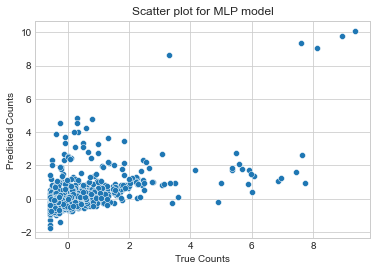

In [39]:
# plotting the predicted count vs true count for support vector regression

sns.scatterplot(Y_test_std[0], Y_pred_MLP[0]).set(title = 'Scatter plot for MLP model')
plt.xlabel("True Counts")
plt.ylabel("Predicted Counts")

### Question 3

#### Using Convolutional Neural Networks

Q3.a: Use a convolutional neural network (in Keras or PyTorch) to solve this problem in much the same was as in part (ii) of Question (2). 

You are to develop an architecture of the neural network that takes an image directly as input and produces a count as the output corresponding to T3 cells. You are free to choose any network structure as long as you can show that it gives good performance. 

Report your results on the test examples by plotting the scatter plot between true and predicted counts on the test data. Also, report your results in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score. 

You will be evaluated on the design of your machine learning model and final performance metrics. Try to get the best test performance you can. 

Please include convergence plots in your submission showing how does loss change over training epochs.

In [43]:
# prepare the train, test image data

train_idx = np.where(F < 3)
test_idx = np.where(F == 3)

cnn_train_x = X[train_idx]
cnn_train_y = Y['T3'].iloc[train_idx].to_numpy(dtype = 'float32')
cnn_test_x = X[test_idx]
cnn_test_y = Y['T3'].iloc[test_idx].to_numpy(dtype = 'float32')

print(cnn_train_x.shape)
print(cnn_train_y.shape)
print(cnn_test_x.shape)
print(cnn_test_y.shape)

(3373, 256, 256, 3)
(3373,)
(1608, 256, 256, 3)
(1608,)


In [4]:
# scale pixels and reshape y to categorical

from keras import utils

def prep(train, test):
	# normalize to range 0-1
	train_norm = train / 255.0
	test_norm = test / 255.0

	return train_norm, test_norm

cnn_train_x, cnn_test_x = prep(cnn_train_x, cnn_test_x)

In [6]:
# define CNN model

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten
# from keras.optimizers import SGD

def define_model():
	# create the model
	model = Sequential()
	model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(256, 256, 3)))
	model.add(MaxPool2D())
	model.add(Flatten())
	model.add(Dense(32, activation='relu'))
	model.add(Dense(16, activation='relu'))
	model.add(Dense(1, activation='linear'))

	# compile model
	# opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer='adam', loss='mean_squared_error')

	return model

In [46]:
# fit the CNN model

model = define_model()
history = model.fit(cnn_train_x, cnn_train_y, epochs=10, batch_size=32, validation_data=(cnn_test_x, cnn_test_y), verbose=0)

In [9]:
# get the predicted results and plot it vs true cell count

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr, pearsonr
from math import sqrt

y_p = model.predict(cnn_test_x, verbose=0)

pred = pd.DataFrame(y_p)
cnn_test_y_d = pd.DataFrame(cnn_test_y)

R2 = r2_score(cnn_test_y_d, pred)
RMSE = sqrt(mean_squared_error(cnn_test_y_d, pred))
Pearson_R = pearsonr(cnn_test_y_d[0], pred[0])
Spearman_R = spearmanr(cnn_test_y_d, pred)

print('R2 score:', R2)
print('Root mean squared error:', RMSE)
print('Pearson correlation coefficient:', Pearson_R[0])
print('Spearman correlation coefficient:', Spearman_R[0])

R2 score: 0.32173682546356264
Root mean squared error: 24.335176302300802
Pearson correlation coefficient: 0.6242790519761459
Spearman correlation coefficient: 0.6861679690307296


C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Counts')

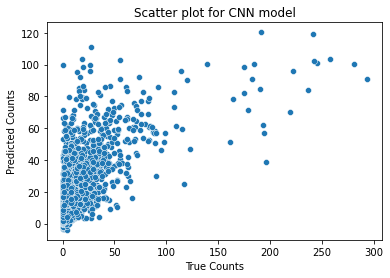

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(cnn_test_y_d[0], pred[0]).set(title = 'Scatter plot for CNN model')
plt.xlabel("True Counts")
plt.ylabel("Predicted Counts")

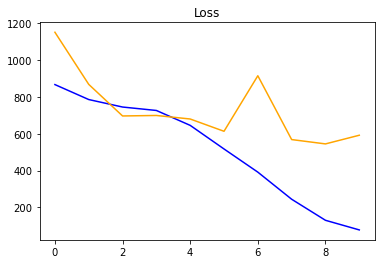

In [12]:
# plot the loss and change

plt.title('Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.show()


Q3.b: Use three fold cross validation with your optimal network architecture to predict the counts of T3 cells. 

Do 3-fold cross-validation with the given folds and report the results for each test fold in the form of separate predicted-vs-actual count scatter plots (3 folds so 3 plots in total) using your model and report your results in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score for each fold separately.

In [7]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr, pearsonr
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# define a function to calculate metrics

def get_metrics(pred, Ytt):
    predict = pd.DataFrame(pred)
    Ytest = pd.DataFrame(Ytt)

    R2 = r2_score(Ytest, predict)
    RMSE = sqrt(mean_squared_error(Ytest, predict))
    Pearson_R = pearsonr(Ytest[0], predict[0])
    Spearman_R = spearmanr(Ytest, predict)

    return R2, RMSE, Pearson_R, Spearman_R

In [9]:
# cross-validation

prediction = []
for i in range(3):
    tt_idx = np.where(F == i+1)
    tr_idx = np.where(F != i+1) # get the indices

    trainx = X[tr_idx]
    trainy = Y['T3'].iloc[tr_idx].to_numpy(dtype = 'float32')
    testx = X[tt_idx]
    testy = Y['T3'].iloc[tt_idx].to_numpy(dtype = 'float32')

    xtr_norm, xtt_norm = prep(trainx, testx)

    model = define_model()
    history = model.fit(xtr_norm, trainy, epochs=10, batch_size=32, validation_data=(xtt_norm, testy), verbose=0)
    ypred = model.predict(xtt_norm, verbose=0)
    prediction.append(ypred)

    metrics = get_metrics(ypred, testy)

    print("Fold", i+1, ", R2: ", metrics[0])
    print("Fold", i+1, ", RMSE: ", metrics[1])
    print("Fold", i+1, ", Pearson r: ", metrics[2][0])
    print("Fold", i+1, ", Spearman r: ", metrics[3][0])

Fold 1 , R2:  0.21081291424312387
Fold 1 , RMSE:  25.53878766294455
Fold 1 , Pearson r:  0.5654971138382916
Fold 1 , Spearman r:  0.6770338906309734
Fold 2 , R2:  0.33377547458655155
Fold 2 , RMSE:  26.89158168511744
Fold 2 , Pearson r:  0.6053391932913971
Fold 2 , Spearman r:  0.6523908751882701
Fold 3 , R2:  0.3674701849186267
Fold 3 , RMSE:  23.500435033789135
Fold 3 , Pearson r:  0.6102822114532609
Fold 3 , Spearman r:  0.6547060240403836


In [9]:
# get the indices for each fold

idx_1 = np.where(F == 1)
idx_2 = np.where(F == 2)
idx_3 = np.where(F == 3)

C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


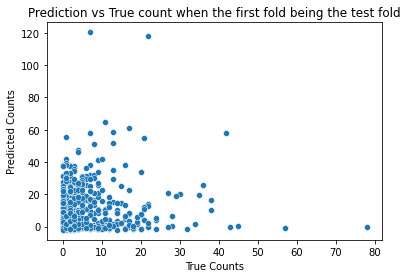

C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


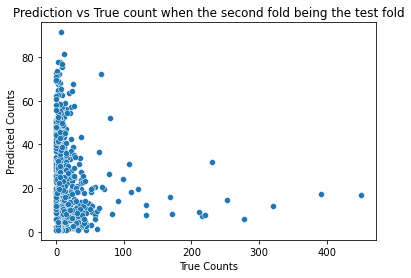

C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


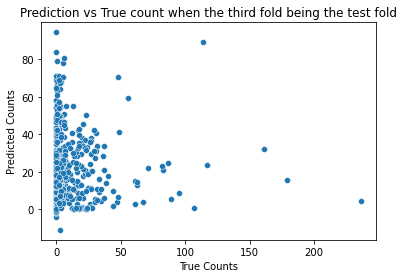

In [11]:

plt.title('Prediction vs True count when the first fold being the test fold')
sns.scatterplot(Y['T3'].iloc[idx_1], pd.DataFrame(prediction[0])[0])
plt.xlabel("True Counts")
plt.ylabel("Predicted Counts")
plt.show()

plt.title('Prediction vs True count when the second fold being the test fold')
sns.scatterplot(Y['T3'].iloc[idx_2], pd.DataFrame(prediction[1])[0])
plt.xlabel("True Counts")
plt.ylabel("Predicted Counts")
plt.show()

plt.title('Prediction vs True count when the third fold being the test fold')
sns.scatterplot(Y['T3'].iloc[idx_3], pd.DataFrame(prediction[2])[0])
plt.xlabel("True Counts")
plt.ylabel("Predicted Counts")
plt.show()


Q3.c: Use a convolutional neural network (in Keras or Pytorch) to predict the counts of 6 types of cells simultaneously given the image patch as input and perform 3-fold cross-validation using the given folds. 

You are free to choose any network structure as long as you can show that it gives good cross-validation performance. 

Do 3-fold cross-validation using the specified folds and report the results for each test fold for each cell type in the form of separate predicted-vs-actual count scatter plots (3 folds, 6 cell types so 18 plots in total) using your optimal machine learning model and report your results in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score for each cell type and each fold separately along with the average of each cell type across the 3 folds.

In [19]:
# for T1 cell

prediction = []
R2 = []
RMSE = []
PearsonR = []
SpearmanR = []

for i in range(3):
    tt_idx = np.where(F == i+1)
    tr_idx = np.where(F != i+1) # get the indices

    trainx = X[tr_idx]
    trainy = Y['T1'].iloc[tr_idx].to_numpy(dtype = 'float32')
    testx = X[tt_idx]
    testy = Y['T1'].iloc[tt_idx].to_numpy(dtype = 'float32')

    xtr_norm, xtt_norm = prep(trainx, testx)

    model = define_model()
    history = model.fit(xtr_norm, trainy, epochs=10, batch_size=32, validation_data=(xtt_norm, testy), verbose=0)
    ypred = model.predict(xtt_norm, verbose=0)
    prediction.append(ypred)

    metrics = get_metrics(ypred, testy)
    R2.append(metrics[0])
    RMSE.append(metrics[1])
    PearsonR.append(metrics[2][0])
    SpearmanR.append(metrics[3][0])

In [20]:
print("For T1 cells, average R2: ", np.mean(R2), "standard deviation: ", np.std(R2))
print("For T1 cells, average RMSE: ", np.mean(RMSE), "standard deviation: ", np.std(RMSE))
print("For T1 cells, average Pearson r: ", np.mean(PearsonR), "standard deviation: ", np.std(PearsonR))
print("For T1 cells,, average Spearman r: ", np.mean(SpearmanR), "standard deviation: ", np.std(SpearmanR))

For T1 cells, average R2:  -0.2437438961611027 standard deviation:  0.1618554140930334
For T1 cells, average RMSE:  3.0053576312067514 standard deviation:  0.7592972413640009
For T1 cells, average Pearson r:  0.06968344630409533 standard deviation:  0.02596868014419265
For T1 cells,, average Spearman r:  0.0852422411838933 standard deviation:  0.019649299910706814


C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


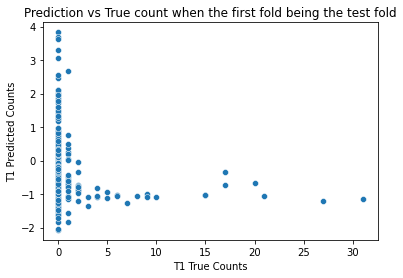

C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


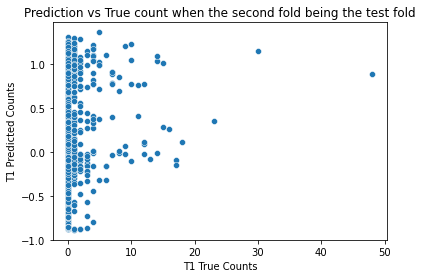

C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


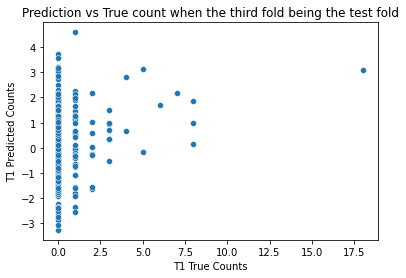

In [21]:
plt.title('Prediction vs True count when the first fold being the test fold')
sns.scatterplot(Y['T1'].iloc[idx_1], pd.DataFrame(prediction[0])[0])
plt.xlabel("T1 True Counts")
plt.ylabel("T1 Predicted Counts")
plt.show()

plt.title('Prediction vs True count when the second fold being the test fold')
sns.scatterplot(Y['T1'].iloc[idx_2], pd.DataFrame(prediction[1])[0])
plt.xlabel("T1 True Counts")
plt.ylabel("T1 Predicted Counts")
plt.show()

plt.title('Prediction vs True count when the third fold being the test fold')
sns.scatterplot(Y['T1'].iloc[idx_3], pd.DataFrame(prediction[2])[0])
plt.xlabel("T1 True Counts")
plt.ylabel("T1 Predicted Counts")
plt.show()


In [14]:
# for T2 cell

prediction = []
R2 = []
RMSE = []
PearsonR = []
SpearmanR = []

for i in range(3):
    tt_idx = np.where(F == i+1)
    tr_idx = np.where(F != i+1) # get the indices

    trainx = X[tr_idx]
    trainy = Y['T2'].iloc[tr_idx].to_numpy(dtype = 'float32')
    testx = X[tt_idx]
    testy = Y['T2'].iloc[tt_idx].to_numpy(dtype = 'float32')

    xtr_norm, xtt_norm = prep(trainx, testx)

    model = define_model()
    history = model.fit(xtr_norm, trainy, epochs=10, batch_size=32, validation_data=(xtt_norm, testy), verbose=0)
    ypred = model.predict(xtt_norm, verbose=0)
    prediction.append(ypred)

    metrics = get_metrics(ypred, testy)
    R2.append(metrics[0])
    RMSE.append(metrics[1])
    PearsonR.append(metrics[2][0])
    SpearmanR.append(metrics[3][0])

In [15]:
print("For T2 cells, average R2: ", np.mean(R2), "standard deviation: ", np.std(R2))
print("For T2 cells, average RMSE: ", np.mean(RMSE), "standard deviation: ", np.std(RMSE))
print("For T2 cells, average Pearson r: ", np.mean(PearsonR), "standard deviation: ", np.std(PearsonR))
print("For T2 cells,, average Spearman r: ", np.mean(SpearmanR), "standard deviation: ", np.std(SpearmanR))

For T2 cells, average R2:  0.2978729675403393 standard deviation:  0.039345746781470736
For T2 cells, average RMSE:  29.35782295077934 standard deviation:  2.2771676119427817
For T2 cells, average Pearson r:  0.5716715040247197 standard deviation:  0.030868251856143225
For T2 cells,, average Spearman r:  0.5819534875897939 standard deviation:  0.027150923072463227


C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


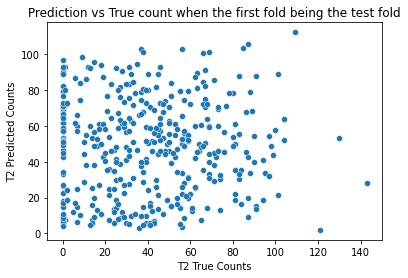

C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


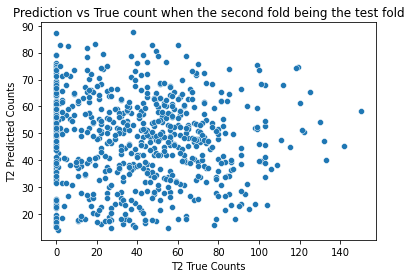

C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


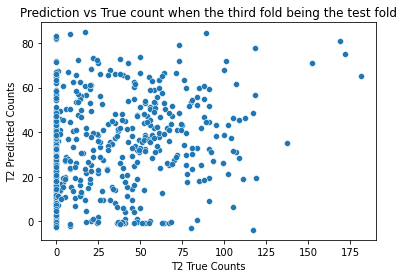

In [16]:
plt.title('Prediction vs True count when the first fold being the test fold')
sns.scatterplot(Y['T2'].iloc[idx_1], pd.DataFrame(prediction[0])[0])
plt.xlabel("T2 True Counts")
plt.ylabel("T2 Predicted Counts")
plt.show()

plt.title('Prediction vs True count when the second fold being the test fold')
sns.scatterplot(Y['T2'].iloc[idx_2], pd.DataFrame(prediction[1])[0])
plt.xlabel("T2 True Counts")
plt.ylabel("T2 Predicted Counts")
plt.show()

plt.title('Prediction vs True count when the third fold being the test fold')
sns.scatterplot(Y['T2'].iloc[idx_3], pd.DataFrame(prediction[2])[0])
plt.xlabel("T2 True Counts")
plt.ylabel("T2 Predicted Counts")
plt.show()

In [10]:
# for T4 cell

prediction = []
R2 = []
RMSE = []
PearsonR = []
SpearmanR = []

for i in range(3):
    tt_idx = np.where(F == i+1)
    tr_idx = np.where(F != i+1) # get the indices

    trainx = X[tr_idx]
    trainy = Y['T4'].iloc[tr_idx].to_numpy(dtype = 'float32')
    testx = X[tt_idx]
    testy = Y['T4'].iloc[tt_idx].to_numpy(dtype = 'float32')

    xtr_norm, xtt_norm = prep(trainx, testx)

    model = define_model()
    history = model.fit(xtr_norm, trainy, epochs=10, batch_size=32, validation_data=(xtt_norm, testy), verbose=0)
    ypred = model.predict(xtt_norm, verbose=0)
    prediction.append(ypred)

    metrics = get_metrics(ypred, testy)
    R2.append(metrics[0])
    RMSE.append(metrics[1])
    PearsonR.append(metrics[2][0])
    SpearmanR.append(metrics[3][0])

In [11]:
print("For T4 cells, average R2: ", np.mean(R2), "standard deviation: ", np.std(R2))
print("For T4 cells, average RMSE: ", np.mean(RMSE), "standard deviation: ", np.std(RMSE))
print("For T4 cells, average Pearson r: ", np.mean(PearsonR), "standard deviation: ", np.std(PearsonR))
print("For T4 cells,, average Spearman r: ", np.mean(SpearmanR), "standard deviation: ", np.std(SpearmanR))

For T4 cells, average R2:  0.039891144746598016 standard deviation:  0.038538503209741316
For T4 cells, average RMSE:  7.962324413793418 standard deviation:  0.5935875225754081
For T4 cells, average Pearson r:  0.28195695161308265 standard deviation:  0.04502804462355984
For T4 cells,, average Spearman r:  0.40967354920071947 standard deviation:  0.010030155508302968


C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


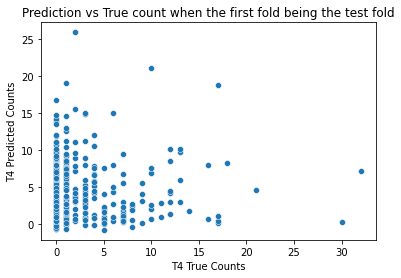

C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


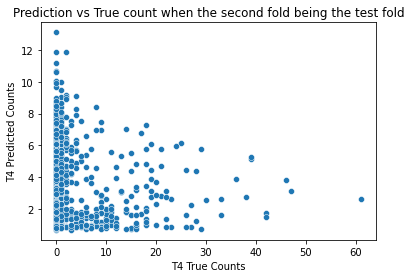

C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


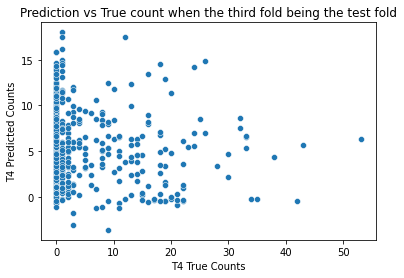

In [12]:
plt.title('Prediction vs True count when the first fold being the test fold')
sns.scatterplot(Y['T4'].iloc[idx_1], pd.DataFrame(prediction[0])[0])
plt.xlabel("T4 True Counts")
plt.ylabel("T4 Predicted Counts")
plt.show()

plt.title('Prediction vs True count when the second fold being the test fold')
sns.scatterplot(Y['T4'].iloc[idx_2], pd.DataFrame(prediction[1])[0])
plt.xlabel("T4 True Counts")
plt.ylabel("T4 Predicted Counts")
plt.show()

plt.title('Prediction vs True count when the third fold being the test fold')
sns.scatterplot(Y['T4'].iloc[idx_3], pd.DataFrame(prediction[2])[0])
plt.xlabel("T4 True Counts")
plt.ylabel("T4 Predicted Counts")
plt.show()

In [13]:
# for T5 cell

prediction = []
R2 = []
RMSE = []
PearsonR = []
SpearmanR = []

for i in range(3):
    tt_idx = np.where(F == i+1)
    tr_idx = np.where(F != i+1) # get the indices

    trainx = X[tr_idx]
    trainy = Y['T5'].iloc[tr_idx].to_numpy(dtype = 'float32')
    testx = X[tt_idx]
    testy = Y['T5'].iloc[tt_idx].to_numpy(dtype = 'float32')

    xtr_norm, xtt_norm = prep(trainx, testx)

    model = define_model()
    history = model.fit(xtr_norm, trainy, epochs=10, batch_size=32, validation_data=(xtt_norm, testy), verbose=0)
    ypred = model.predict(xtt_norm, verbose=0)
    prediction.append(ypred)

    metrics = get_metrics(ypred, testy)
    R2.append(metrics[0])
    RMSE.append(metrics[1])
    PearsonR.append(metrics[2][0])
    SpearmanR.append(metrics[3][0])

In [14]:
print("For T5 cells, average R2: ", np.mean(R2), "standard deviation: ", np.std(R2))
print("For T5 cells, average RMSE: ", np.mean(RMSE), "standard deviation: ", np.std(RMSE))
print("For T5 cells, average Pearson r: ", np.mean(PearsonR), "standard deviation: ", np.std(PearsonR))
print("For T5 cells,, average Spearman r: ", np.mean(SpearmanR), "standard deviation: ", np.std(SpearmanR))

For T5 cells, average R2:  -0.022878242202038084 standard deviation:  0.03615663071518879
For T5 cells, average RMSE:  1.5448216644276995 standard deviation:  0.16620484193644228
For T5 cells, average Pearson r:  0.1673997993590696 standard deviation:  0.025426793086226914
For T5 cells,, average Spearman r:  0.17689306102511115 standard deviation:  0.02151623370751434


C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


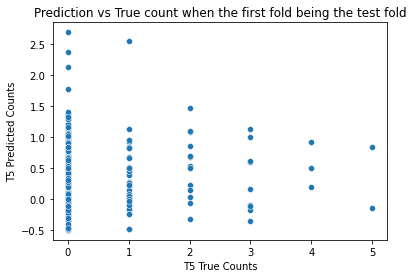

C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


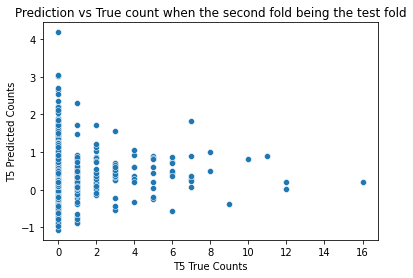

C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


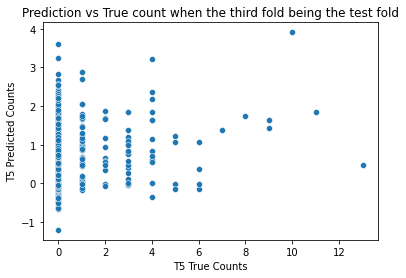

In [15]:
plt.title('Prediction vs True count when the first fold being the test fold')
sns.scatterplot(Y['T5'].iloc[idx_1], pd.DataFrame(prediction[0])[0])
plt.xlabel("T5 True Counts")
plt.ylabel("T5 Predicted Counts")
plt.show()

plt.title('Prediction vs True count when the second fold being the test fold')
sns.scatterplot(Y['T5'].iloc[idx_2], pd.DataFrame(prediction[1])[0])
plt.xlabel("T5 True Counts")
plt.ylabel("T5 Predicted Counts")
plt.show()

plt.title('Prediction vs True count when the third fold being the test fold')
sns.scatterplot(Y['T5'].iloc[idx_3], pd.DataFrame(prediction[2])[0])
plt.xlabel("T5 True Counts")
plt.ylabel("T5 Predicted Counts")
plt.show()

In [16]:
# for T6 cell

prediction = []
R2 = []
RMSE = []
PearsonR = []
SpearmanR = []

for i in range(3):
    tt_idx = np.where(F == i+1)
    tr_idx = np.where(F != i+1) # get the indices

    trainx = X[tr_idx]
    trainy = Y['T6'].iloc[tr_idx].to_numpy(dtype = 'float32')
    testx = X[tt_idx]
    testy = Y['T6'].iloc[tt_idx].to_numpy(dtype = 'float32')

    xtr_norm, xtt_norm = prep(trainx, testx)

    model = define_model()
    history = model.fit(xtr_norm, trainy, epochs=10, batch_size=32, validation_data=(xtt_norm, testy), verbose=0)
    ypred = model.predict(xtt_norm, verbose=0)
    prediction.append(ypred)

    metrics = get_metrics(ypred, testy)
    R2.append(metrics[0])
    RMSE.append(metrics[1])
    PearsonR.append(metrics[2][0])
    SpearmanR.append(metrics[3][0])

In [17]:
print("For T6 cells, average R2: ", np.mean(R2), "standard deviation: ", np.std(R2))
print("For T6 cells, average RMSE: ", np.mean(RMSE), "standard deviation: ", np.std(RMSE))
print("For T6 cells, average Pearson r: ", np.mean(PearsonR), "standard deviation: ", np.std(PearsonR))
print("For T6 cells,, average Spearman r: ", np.mean(SpearmanR), "standard deviation: ", np.std(SpearmanR))

For T6 cells, average R2:  0.02569784730092291 standard deviation:  0.06293104843282635
For T6 cells, average RMSE:  16.926018846467247 standard deviation:  1.270946063531166
For T6 cells, average Pearson r:  0.30718683380571443 standard deviation:  0.0295263724199279
For T6 cells,, average Spearman r:  0.31326305016373635 standard deviation:  0.033710912190117175


C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


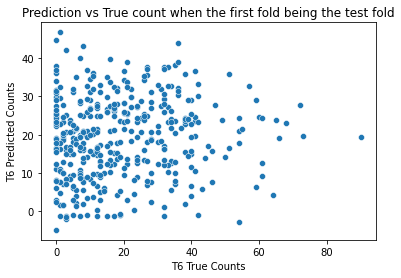

C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


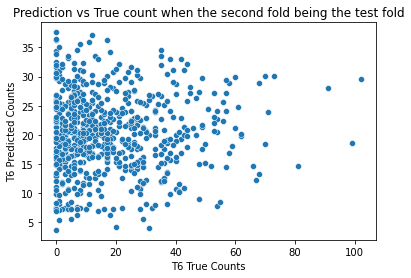

C:\Users\78336\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


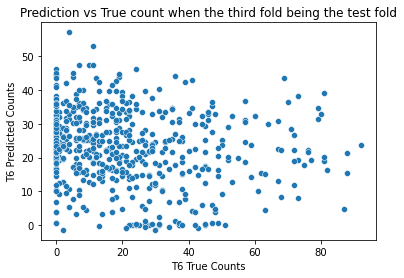

In [18]:
plt.title('Prediction vs True count when the first fold being the test fold')
sns.scatterplot(Y['T6'].iloc[idx_1], pd.DataFrame(prediction[0])[0])
plt.xlabel("T6 True Counts")
plt.ylabel("T6 Predicted Counts")
plt.show()

plt.title('Prediction vs True count when the second fold being the test fold')
sns.scatterplot(Y['T6'].iloc[idx_2], pd.DataFrame(prediction[1])[0])
plt.xlabel("T6 True Counts")
plt.ylabel("T6 Predicted Counts")
plt.show()

plt.title('Prediction vs True count when the third fold being the test fold')
sns.scatterplot(Y['T6'].iloc[idx_3], pd.DataFrame(prediction[2])[0])
plt.xlabel("T6 True Counts")
plt.ylabel("T6 Predicted Counts")
plt.show()

A3.c: Overall, the model demonstrate poor performance, possibily due the large variance in the data, which makes the RMSE score very large. Furthermore, by comparing descriptive statistical results the 4 evaluation metrics in the cross-validation, model predicting T3 cell count gives the best performance.

|           | T1 | T2 | T3 | T4 | T5 | T6 |
| :-----:   | :---: | :-------: | :-: | :-: | :-: | :-: |
| R2 mean(std.)|-0.24(0.16)|0.30(0.04)|0.31(0.04)|0.04(0.04)|-0.02(0.04)|0.03(0.06)|
|RMSE mean(std.)|3.01(0.76)|29.36(2.28)|25.17(1.90)|7.96(0.59)|1.54(0.17)|16.97(1.27)|
|Pearson r mean(std.)|0.07(0.03)|0.57(0.03)|0.60(0.04)|0.28(0.05)|0.17(0.03)|0.31(0.03)|
|Spearman r mean(std.)|0.09(0.02)|0.58(0.03)|0.67(0.01)|0.41(0.01)|0.18(0.02)|0.31(0.03)|